# **Import Package**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import missingno as msno

# **Reading the data**

In [3]:
path = 'online_retail_II.xlsx'
sheet1 = pd.read_excel(path, 
                   sheet_name=0
                  )
sheet2 = pd.read_excel(path, 
                       sheet_name=1
                      )
df = pd.concat([sheet1, sheet2], axis=0, ignore_index=True)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">
    <h2><strong>Dataset Details:</strong></h2>
    This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.<br>
    Link - <a href="https://archive.ics.uci.edu/dataset/502/online+retail+ii" target="_blank">Online Retail Transaction Data</a>

 
#### **Column Details**
- **`InvoiceNo`:**
    - Invoice number.
    - Nominal.
    - A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.  
- **`StockCode`:**
    - Product (item) code.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each distinct product.  
- **`Description`:**
    - Product (item) name.
    - Nominal.  
- **`Quantity`:**
    - The quantities of each product (item) per transaction.
    - Numeric.  
- **`InvoiceDate`:**
    - Invoice date and time.
    - Numeric.
    - The day and time when a transaction was generated.
- **`Price`:**
    - Unit price.
    - Numeric.
    - Product price per unit in sterling (Â£).  
- **`CustomerID`:**
    - Customer number.
    - Nominal.
    - A 5-digit integral number uniquely assigned to each customer.  
- **`Country`:**
    - Country name.
    - Nominal.
    - The name of the country where a customer resides.
</div>

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### **Data types of each column**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### **Summarization of Data**

In [6]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,NaN,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,NaN,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,NaN
min,NaN,NaN,NaN,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,NaN
max,NaN,NaN,NaN,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,NaN


### **How many records are there in the dataset?**

In [7]:
print("Number of records in the dataset: ", df.shape[0])

Number of records in the dataset:  1067371


### **Missing Value Analysis**

In [8]:
df.isnull().sum() / df.shape[0] * 100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

<Axes: >

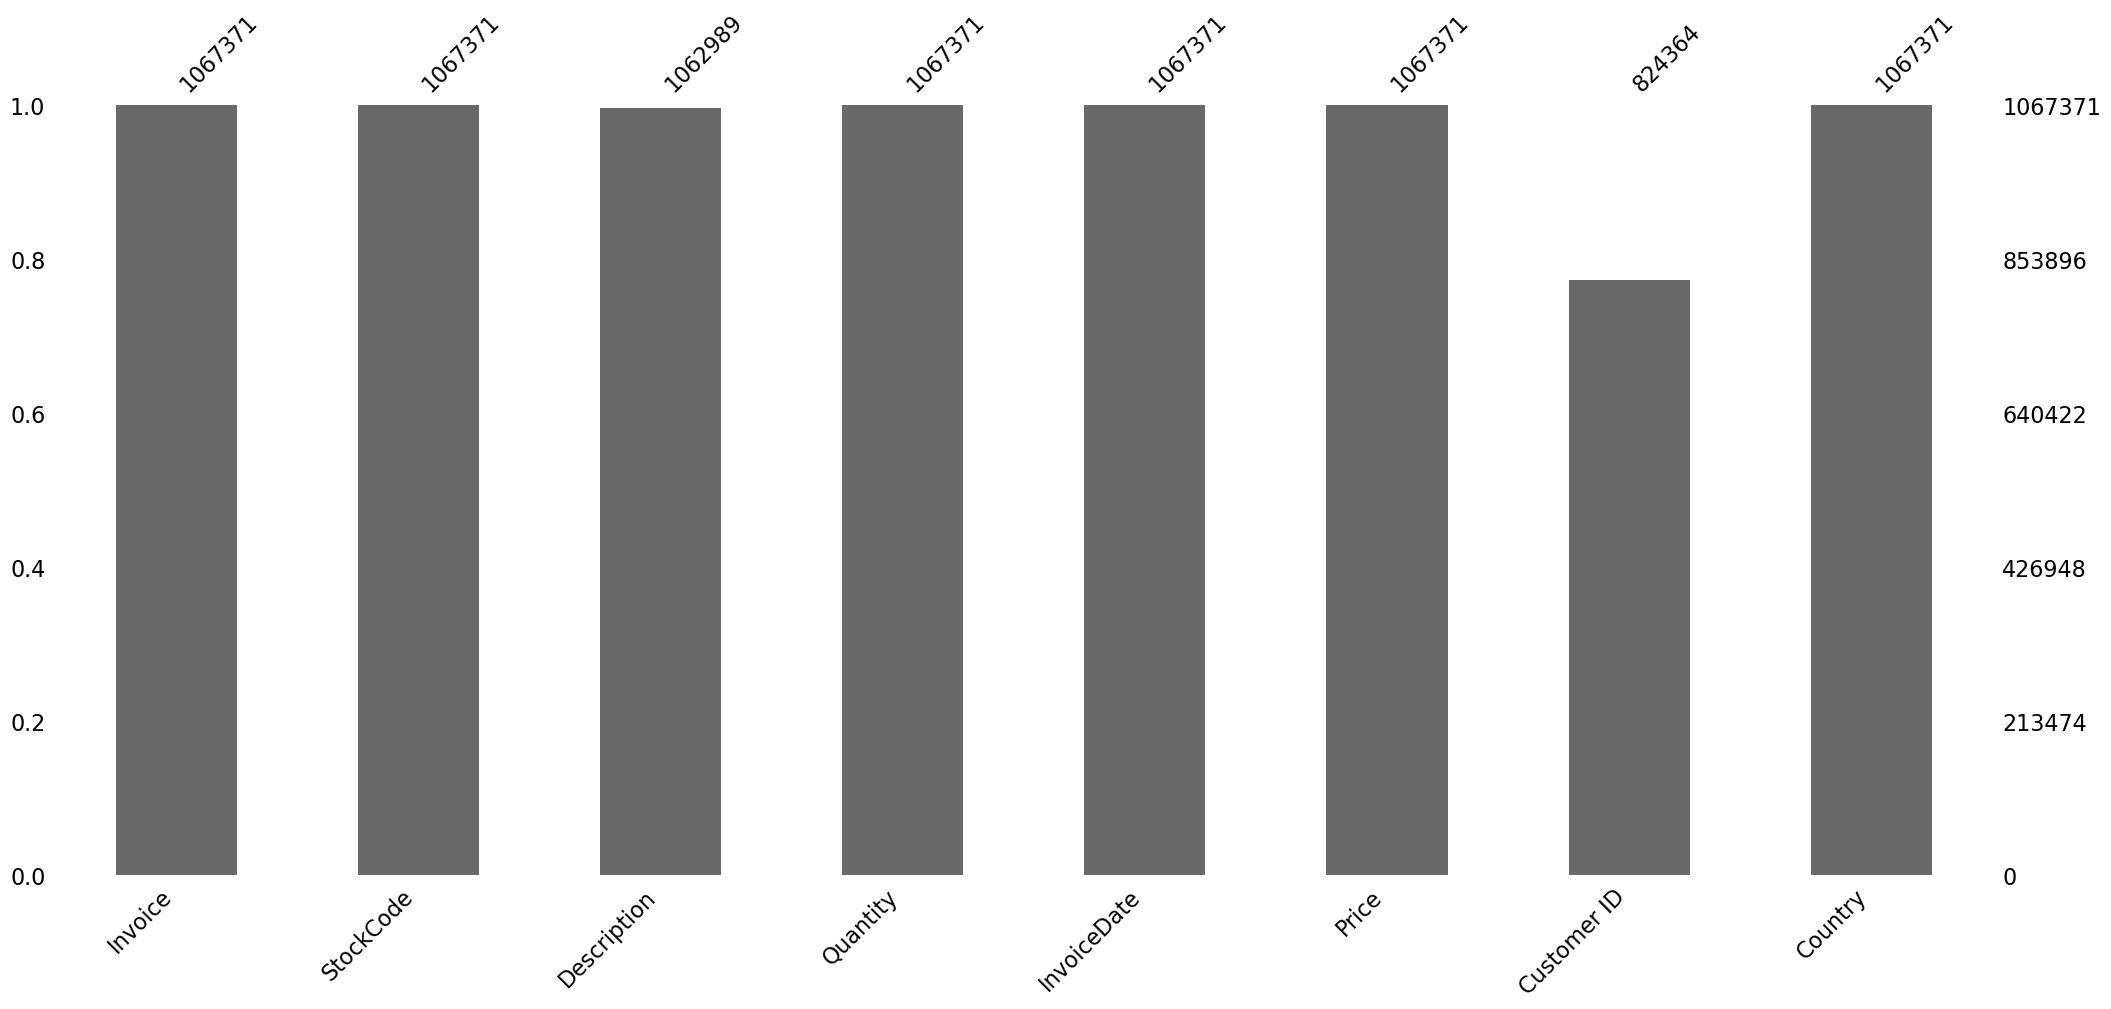

In [9]:
msno.bar(df)

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**  
From the above missing value analysis, it is evident that two columns are missing majority of data while other columns has no missing data.

The column names are:
- **`Description (0.411 %)`**
- **`Customer ID (22.767 %)`**
</div>

In [10]:
df[df['Description'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


In [11]:
print("Number of records with missing Description: ", df[df['Description'].isna()].shape[0])

Number of records with missing Description:  4382


In [12]:
df[df['Description'].isna()]['Price'].value_counts()

Price
0.0    4382
Name: count, dtype: int64

In [13]:
df[df['Description'].isna()]['Customer ID'].value_counts()

Series([], Name: count, dtype: int64)

In [14]:
quantity_type = df[df['Description'].isna()]['Quantity'].value_counts()
quantity_type = quantity_type.reset_index()
quantity_type['Quantity Type'] = quantity_type['Quantity'].apply(lambda a: 'Less than 0' if a < 0 else 'Otherwise')
quantity_type.groupby('Quantity Type')['count'].sum()

Quantity Type
Less than 0    2689
Otherwise      1693
Name: count, dtype: int64

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**    
There are **4382** rows where the **`Description`** column has missing values.  

Upon further analysis, the **`Price`** column has only **0.0** values for each of the missing value of the **`Description`** column.  
The corresponding **`Customer ID`** is also missing.  
Along with that, the **`Quantity`** column has majority values less than **0**, which does not make any sense.  
  
The data might be either corrupted or recorded wrongly for these entries.  
This data should be dropped so that it does not affect the efficiency of ML models adversely.
</div>

In [15]:
df.dropna(subset=['Description'], inplace=True)

In [16]:
df.shape

(1062989, 8)

In [17]:
df[df['Customer ID'].isna()].shape[0]

238625

In [18]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0)].shape[0]

768

In [19]:
df[(df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0)].shape[0]

981

In [20]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0)].shape[0]

749

In [21]:
df[(df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0)].shape[0]

5

In [22]:
df[(df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] > 0)].shape[0]

236122

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

**Note:**
- There are **238625** missing values in the **`Customer ID`** column.
- There are multiple records in the data where the **`Customer ID`** is missing and the values of other prominant columns like **`Quantity`** and **`Price`** does not make any sense.
    - There are **768** records where **`Price`** is **0.0** but the **`Quantity`** is less than **0**.  
    - There ate **981** records whre **`Price`** is equal to **0.0** but **`Quantity`** is greater than **0**.
    - There are **5** records where the **`Price`** is negative.
    - Finally, there are **749** records where **`Price`** is greater than **0.0** but the **`Quantity`** is less than **0**.
- These ambiguous records which holds no logic needs to be dropped.
- There are **236122** records which are logical but the **`Customer ID`** is missing can be handled by imputing with some common value like **Unknown Customer ID**.

</div>

In [23]:
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] == 0.0) & (df['Quantity'] > 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] > 0.0) & (df['Quantity'] <= 0))]
df = df[~((df['Customer ID'].isna()) & (df['Price'] < 0.0) & (df['Quantity'] > 0))]

In [24]:
df[df['Customer ID'].isna()].shape[0]

236122

In [25]:
df['Customer ID'] = df['Customer ID'].fillna(0).astype(int)

In [26]:
df['Customer ID'].head()

0    13085
1    13085
2    13085
3    13085
4    13085
Name: Customer ID, dtype: int64

In [27]:
df['Customer ID'] = df['Customer ID'].astype(str)
df['Customer ID'] = df['Customer ID'].apply(lambda x: "Unknown Customer ID" if x=='0' else x)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [28]:
df['Customer ID'].value_counts()

Customer ID
Unknown Customer ID    236122
17841                   13097
14911                   11613
12748                    7307
14606                    6709
                        ...  
16663                       1
17752                       1
13942                       1
15913                       1
16994                       1
Name: count, Length: 5943, dtype: int64

In [29]:
df['StockCode'] = df['StockCode'].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1060486 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1060486 non-null  object        
 1   StockCode    1060486 non-null  category      
 2   Description  1060486 non-null  object        
 3   Quantity     1060486 non-null  int64         
 4   InvoiceDate  1060486 non-null  datetime64[ns]
 5   Price        1060486 non-null  float64       
 6   Customer ID  1060486 non-null  object        
 7   Country      1060486 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 66.9+ MB


In [31]:
df.drop(columns=['InvoiceDate']).describe()

,Quantity,Price
count,1.060486e+06,1.060486e+06
mean,1.032382e+01,4.427132e+00
std,1.667588e+02,7.607323e+01
min,-8.099500e+04,0.000000e+00
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


In [32]:
df[df['Quantity'] < 0]['Price'].value_counts().sort_index(), df[df['Quantity'] < 0]['Price'].value_counts().sort_index().sum()

(Price
 0.01        2
 0.03        5
 0.05        3
 0.06        4
 0.07        5
            ..
 8985.60     1
 10468.80    2
 10953.50    2
 25111.09    1
 38970.00    1
 Name: count, Length: 687, dtype: int64,
 18744)

#### **Separating the Cancelled Orders from All Orders**

In [33]:
df_cancelled = df[(df['Invoice'].str.startswith('C')) & (df['Invoice'].isna()==False)]
df_cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321,Australia


In [34]:
df = df[~((df['Invoice'].str.startswith('C')) & (df['Invoice'].isna()==False))]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


#### **Total Sales Column Created**

In [35]:
df['Sales'] = df['Price'] * df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [36]:
df = df[~(df['Price'] <= 0)]

In [37]:
df[df['Price'] <= 0].shape[0]

0

In [38]:
df['Description'].nunique()

5399

#### **Dropping Duplicates**

In [39]:
df = df.drop_duplicates()

In [40]:
df.shape

(1007913, 9)

### **Exploratory Data Analysis**

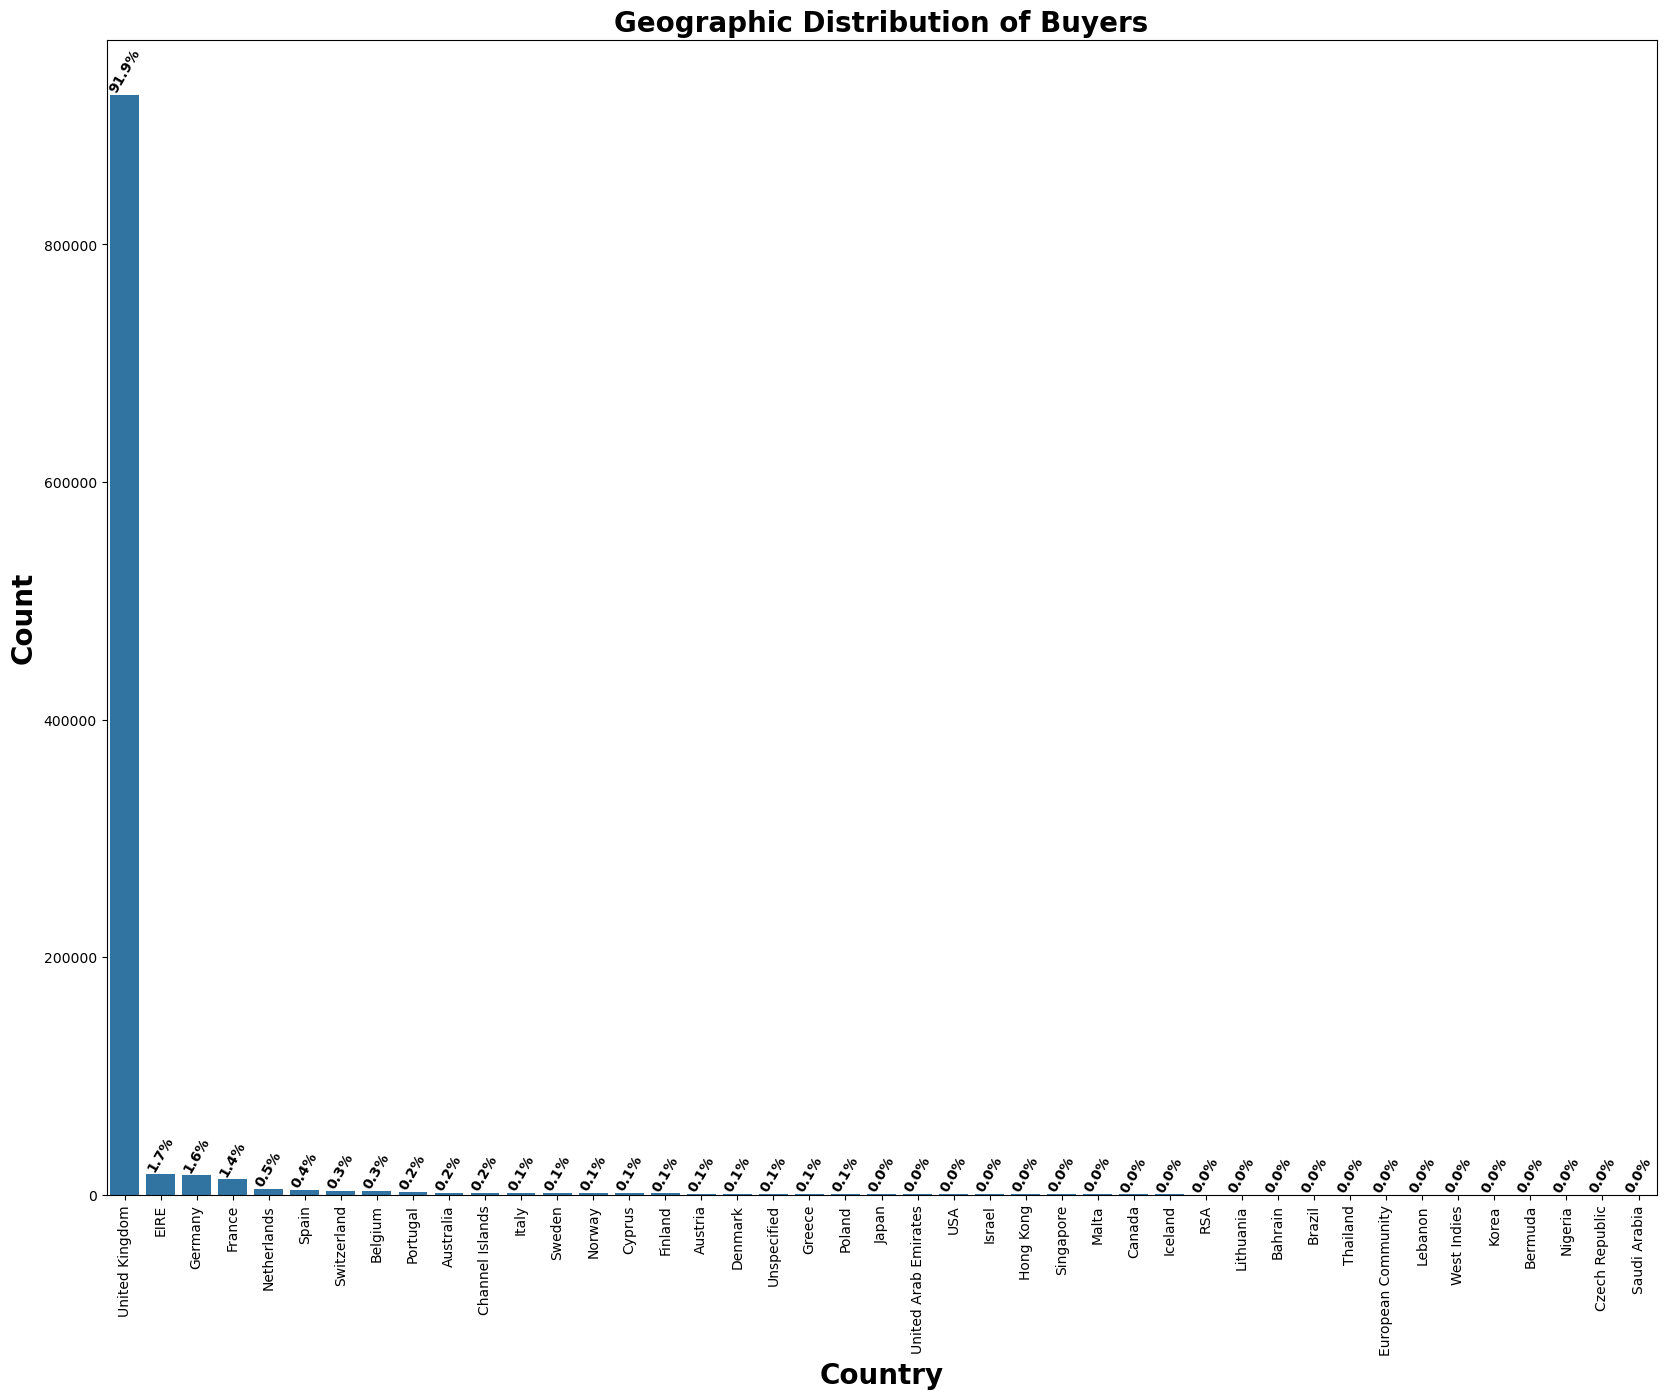

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
country_count = df['Country'].value_counts()
total_count = country_count.sum()
percent = country_count / total_count * 100

# Use Seaborn for visualization
sns.barplot(x=country_count.index, y=country_count.values)

# Annotate bars with percentages
for i, (value, pct) in enumerate(zip(country_count.values, percent)):
    plt.text(i, value, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=60)

plt.xlabel('Country', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Geographic Distribution of Buyers', fontsize=20, fontweight='bold')
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

It is evident that more than 90% of buyers are from United Kingdom. Less than 10% of buyers are from other countries with no country has equal or more than 2% of buyer's share.
</div>

In [42]:
product_pivot = df.pivot_table(index="Description", values="Quantity", aggfunc='sum').reset_index().sort_values(by=['Quantity'], ascending=False)
product_pivot.head(10)

,Description,Quantity
5283,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
5162,WHITE HANGING HEART T-LIGHT HOLDER,94658
3187,"PAPER CRAFT , LITTLE BIRDIE",80995
303,ASSORTED COLOUR BIRD ORNAMENT,80082
2749,MEDIUM CERAMIC TOP STORAGE JAR,78033
2441,JUMBO BAG RED RETROSPOT,77699
769,BROCADE RING PURSE,70369
3123,PACK OF 60 PINK PAISLEY CAKE CASES,56061
160,60 TEATIME FAIRY CAKE CASES,54028
4615,SMALL POPCORN HOLDER,48561


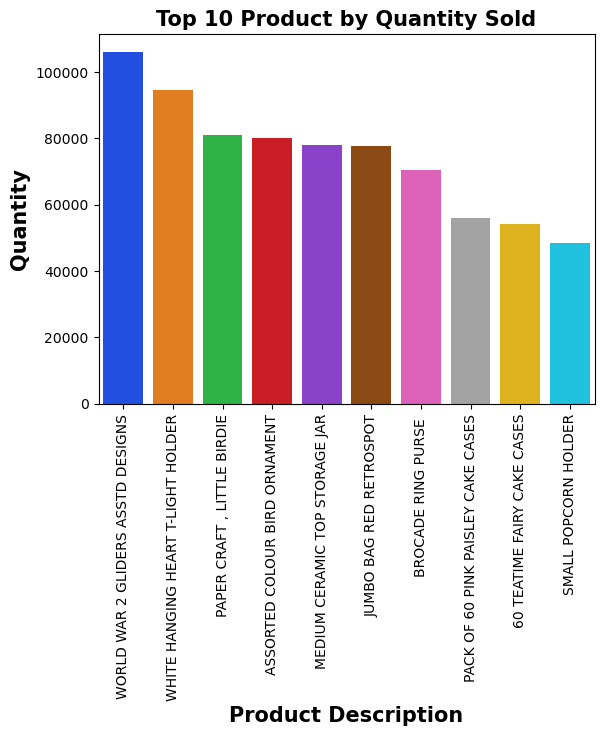

In [43]:
plt.figure(figure=(20, 10))
sns.barplot(data=product_pivot.head(10), x='Description', y='Quantity', hue='Description', palette='bright')
plt.xlabel('Product Description', fontsize=15, fontweight='bold')
plt.ylabel('Quantity', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Top 10 Product by Quantity Sold', fontsize=15, fontweight='bold')
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

The top selling products by the online retail store are --

- WORLD WAR 2 GLIDERS ASSTD DESIGNS
- WHITE HANGING HEART T-LIGHT HOLDER
- PAPER CRAFT , LITTLE BIRDIE
- ASSORTED COLOUR BIRD ORNAMENT
- MEDIUM CERAMIC TOP STORAGE JAR
- JUMBO BAG RED RETROSPOT
- BROCADE RING PURSE
- PACK OF 60 PINK PAISLEY CAKE CASES
- 60 TEATIME FAIRY CAKE CASES
- SMALL POPCORN HOLDER

</div>

In [44]:
top_customer = df.groupby(['Customer ID', 'Country'])[['Sales']].sum().sort_values(by='Sales',ascending=False).reset_index()
top_customer = top_customer[~(top_customer['Customer ID'] == 'Unknown Customer ID')]
top_customer.head(10)

,Customer ID,Country,Sales
1,18102,United Kingdom,580987.04
2,14646,Netherlands,528602.52
3,14156,EIRE,313437.62
4,14911,EIRE,291420.81
5,17450,United Kingdom,244784.25
6,13694,United Kingdom,195640.69
7,17511,United Kingdom,172132.87
8,16446,United Kingdom,168472.50
9,16684,United Kingdom,147142.77
10,12415,Australia,144458.37


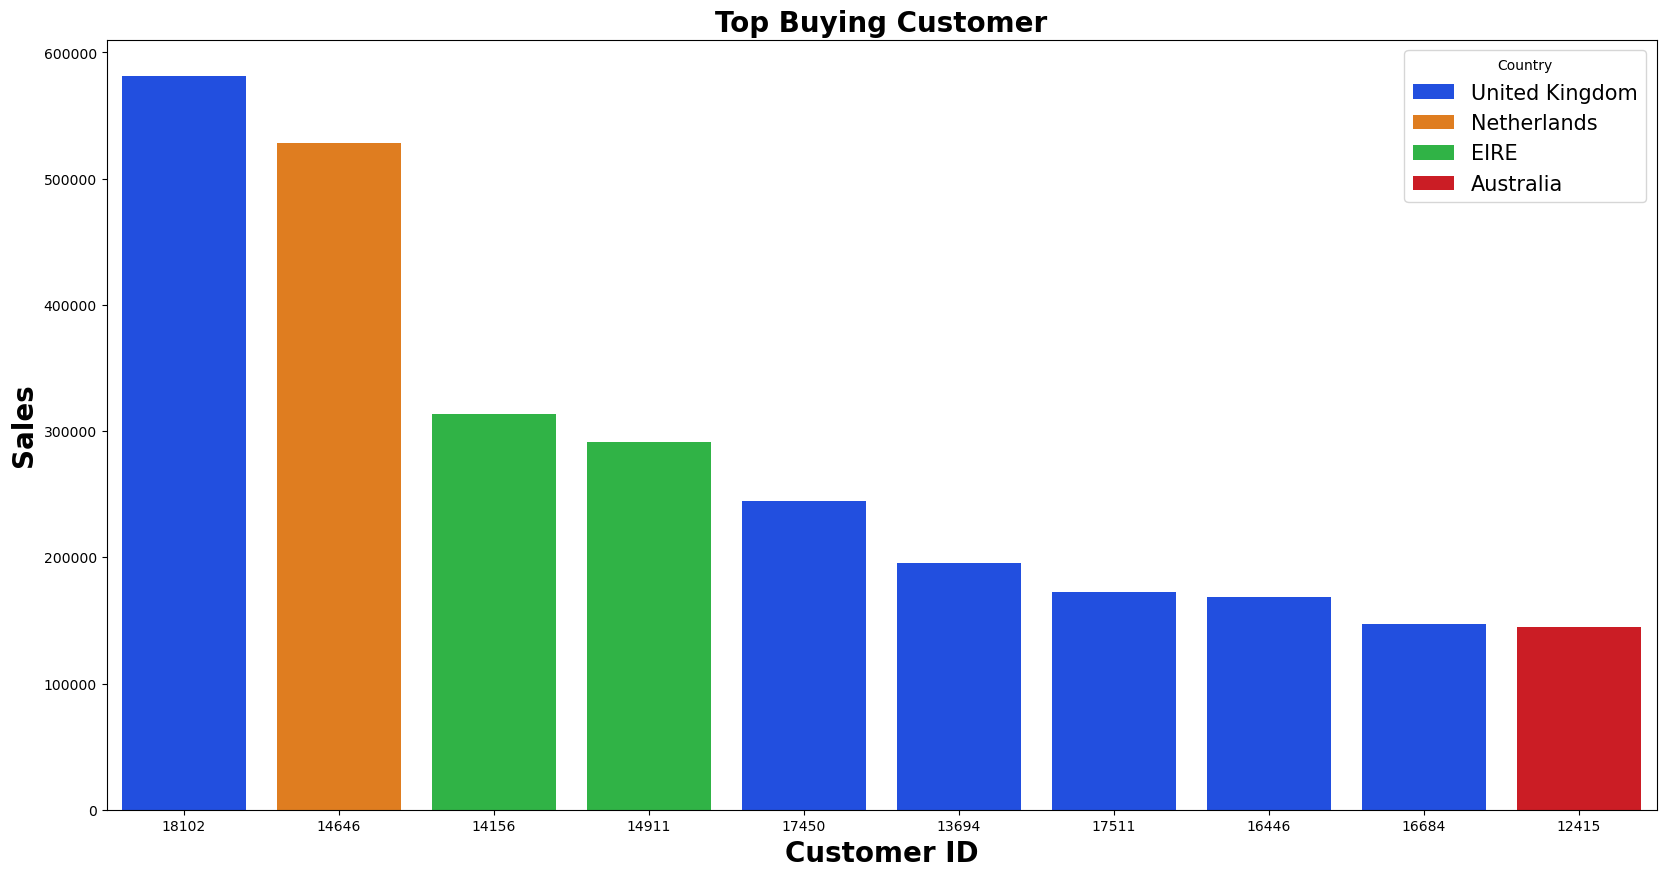

In [45]:
plt.figure(figsize=(20, 10))
sns.barplot(data=top_customer.head(10), x='Customer ID', y='Sales', hue='Country', palette='bright')
plt.xlabel('Customer ID', fontsize=20, fontweight='bold')
plt.ylabel('Sales', fontsize=20, fontweight='bold')
plt.title('Top Buying Customer', fontsize=20, fontweight='bold')
plt.legend(title='Country', fontsize=15)
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the top 10 buying customer are in United Kingdom. Other countries include Netherlands, EIRE (Ireland) and Australia. These shows the online retail store has some good international buyers.

In [46]:
df1 = df.copy()
df1['Month'] = df['InvoiceDate'].dt.strftime('%B')
df1['Day'] = df['InvoiceDate'].dt.strftime('%A')
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,December,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,December,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,December,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,December,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,December,Tuesday


In [47]:
sales_by_month = df1.groupby('Month')[['Sales']].sum().reset_index()
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

sales_by_month['Month'] = pd.Categorical(sales_by_month['Month'], categories=month_order, ordered=True)
sales_by_month.sort_values('Month')

,Month,Sales
4,January,1340966.722
3,February,1074050.286
7,March,1547130.521
0,April,1215843.743
8,May,1427002.110
6,June,1510084.320
5,July,1366886.391
1,August,1453093.290
11,September,1978132.183
10,October,2313165.950


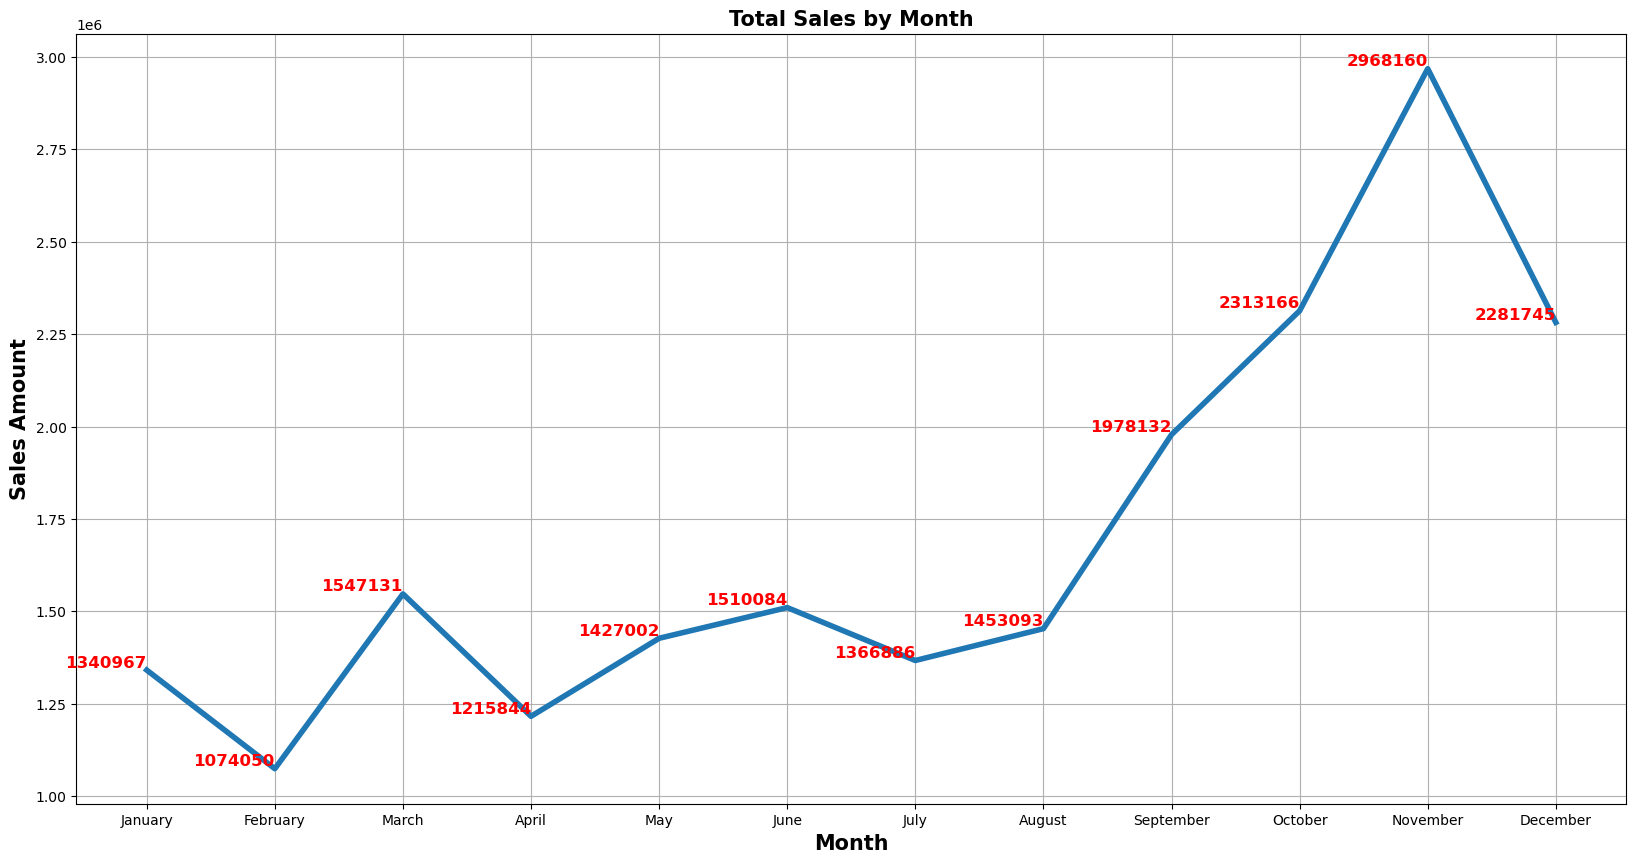

In [48]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=sales_by_month.sort_values('Month'), x='Month', y='Sales', linewidth=4)
for x, y in zip(sales_by_month["Month"], sales_by_month["Sales"]):
    plt.text(x, y, f"{y:.0f}", fontsize=12, ha="right", va="bottom", fontweight="bold", color="red")
plt.xlabel('Month', fontsize=15, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=15, fontweight='bold')
plt.title('Total Sales by Month', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the sales happens during the second half of the year with most sales happening in the month of November. Most of the festivites are celebrated towards the end of the year. As a result the sales of products happen during this time. 

Low sales are primarily in the month of February and April.

In [49]:
sales_by_day = df1.groupby('Day')[['Sales']].sum().reset_index()
day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
sales_by_day['Day'] = pd.Categorical(sales_by_day['Day'], categories=day_order, ordered=True)
sales_by_day.sort_values('Day')

,Day,Sales
1,Monday,3581594.176
5,Tuesday,4078149.962
6,Wednesday,3488444.333
4,Thursday,4195212.762
0,Friday,3323908.883
2,Saturday,9803.050
3,Sunday,1799147.282


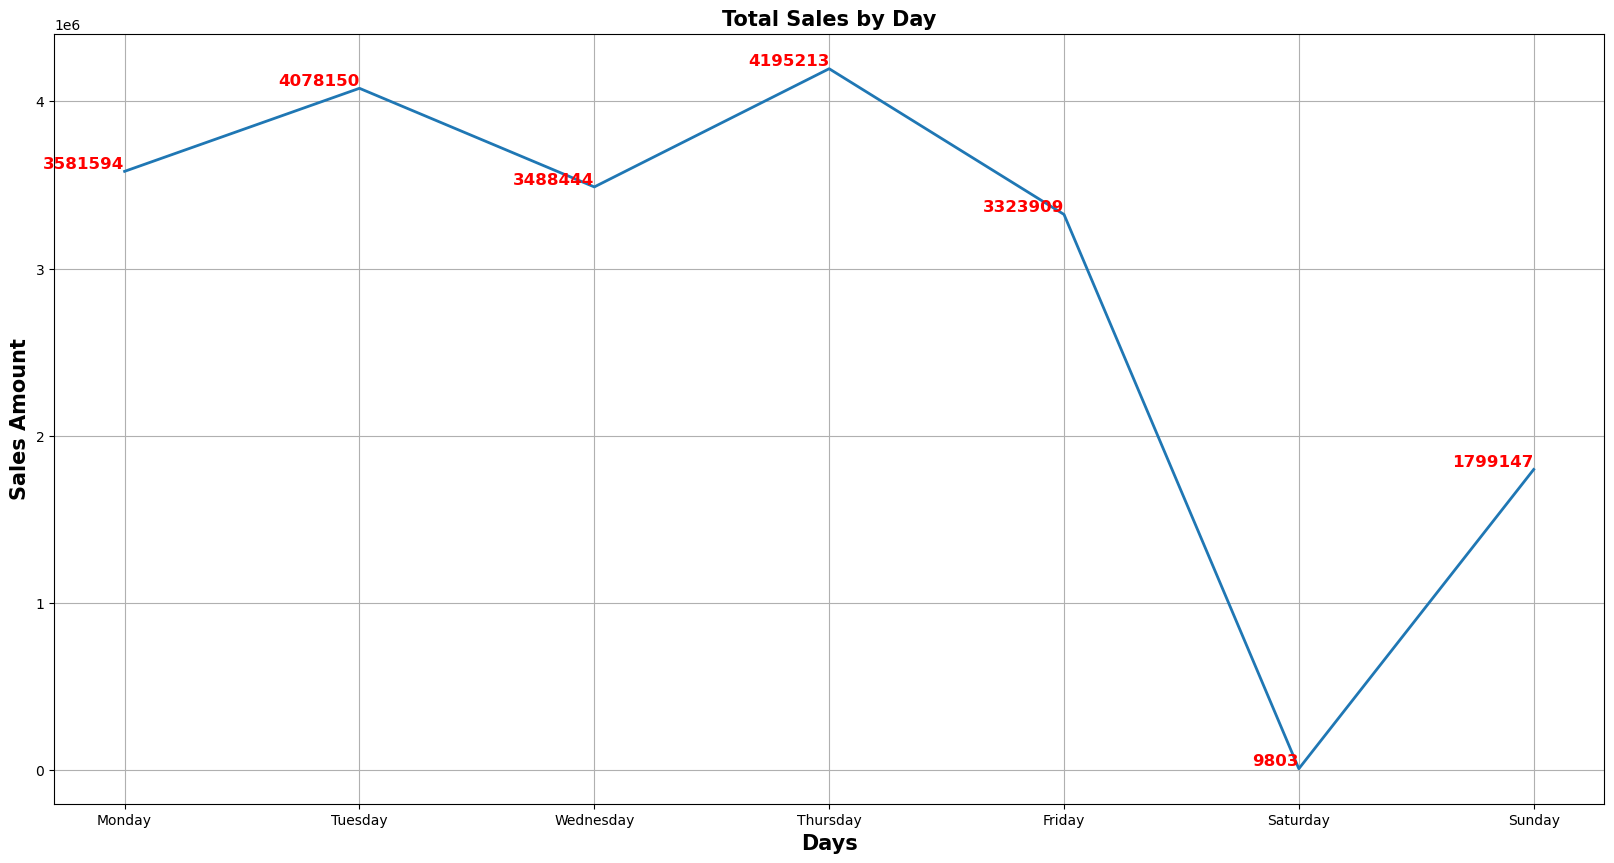

In [50]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=sales_by_day.sort_values('Day'), x='Day', y='Sales', linewidth=2)
for x, y in zip(sales_by_day["Day"], sales_by_day["Sales"]):
    plt.text(x, y, f"{y:.0f}", fontsize=12, ha="right", va="bottom", fontweight="bold", color="red")
plt.xlabel('Days', fontsize=15, fontweight='bold')
plt.ylabel('Sales Amount', fontsize=15, fontweight='bold')
plt.title('Total Sales by Day', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">

Most of the sales happen during the weekdays. During weekends sales are quite low.

</div>

In [51]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


## **United Kingdom**

### **Filtering the data**

In [74]:
def format_dataset(data, country, group, aggfunc, cols):
    filtered_data = data[data['Country'] == country]
    # filtered_data['InvoiceDate'] = filtered_data['InvoiceDate'].dt.strftime('%Y-%m-%d')
    filtered_data = filtered_data.groupby(group)[[cols]].agg([aggfunc])
    filtered_data = filtered_data.resample('D').sum()
    return filtered_data

In [75]:
filtered_data = format_dataset(df, country='United Kingdom', group='InvoiceDate', aggfunc='sum', cols='Sales')
filtered_data.head()

,Sales
,sum
InvoiceDate,
2009-12-01,47668.86
2009-12-02,55875.26
2009-12-03,72820.90
2009-12-04,37966.35
2009-12-05,9042.36


### **Splititng the Data into Train, Test and Validation Data**

In [76]:
def divide_dateset(data, train_size=0.8):
    rows = len(data)

    train_rows = int(len(data) * train_size)
    train_data = data[:train_rows]
    test_data = data[train_rows:]

    return train_data, test_data


In [78]:
X_train, X_test = divide_dateset(filtered_data, train_size=0.8)

In [79]:
X_train, X_val = divide_dateset(X_train, train_size=0.85)

### **Standardizing the values in the range of (0, 1)**

In [80]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = min_max_scaler.fit_transform(X_train)
scaled_X_val = min_max_scaler.transform(X_val)

### **Creating Feature and target variables for LSTM Model**

In [81]:
def create_data(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    
    return np.array(X), np.array(y)

In [82]:
X_train, y_train = create_data(scaled_X_train, time_step=30)
X_val, y_val = create_data(scaled_X_val, time_step=30)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

### **Bidirectonal LSTM Model**

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization, Input

time_step = 30

with tf.device('/CPU:0'):
    model = Sequential([
        Input(shape=(time_step, 1)),  # Define input shape explicitly
        Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
        Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
        Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
        Bidirectional(LSTM(100, activation='relu', return_sequences=True)),
        Bidirectional(LSTM(100, activation='relu', return_sequences=False)),
        Dense(100),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_10                │ (None, 30, 200)        │        81,600 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 30, 200)        │       240,800 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 30, 200)        │       240,800 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 30, 200)        │       240,800 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 200)            │       240,800 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,065,001 (4.06 MB)

 Trainable params: 1,065,001 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
with tf.device('/CPU:0'):
    history = model.fit(
        X_train,  
        y_train,  
        epochs=50,  
        batch_size=16, 
        validation_data=(X_val, y_val),  
        verbose=1
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0460 - val_loss: 0.0156
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0241 - val_loss: 0.0150
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0277 - val_loss: 0.0151
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0298 - val_loss: 0.0153
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0276 - val_loss: 0.0158
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0222 - val_loss: 0.0154
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0203 - val_loss: 0.0158
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0233 - val_loss: 0.0160
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0286 - val_loss: 0.0150
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0219 - val_loss: 0.0158
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0230 - val_loss: 0.0153
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0

In [85]:
scaled_X_test = min_max_scaler.transform(X_test)
X_test, y_test = create_data(scaled_X_val, time_step=30)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_pred = model.predict(X_test)
y_pred_original = min_max_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = min_max_scaler.inverse_transform(y_test.reshape(-1, 1))

2025-03-02 15:28:27.444203: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 951ms/step


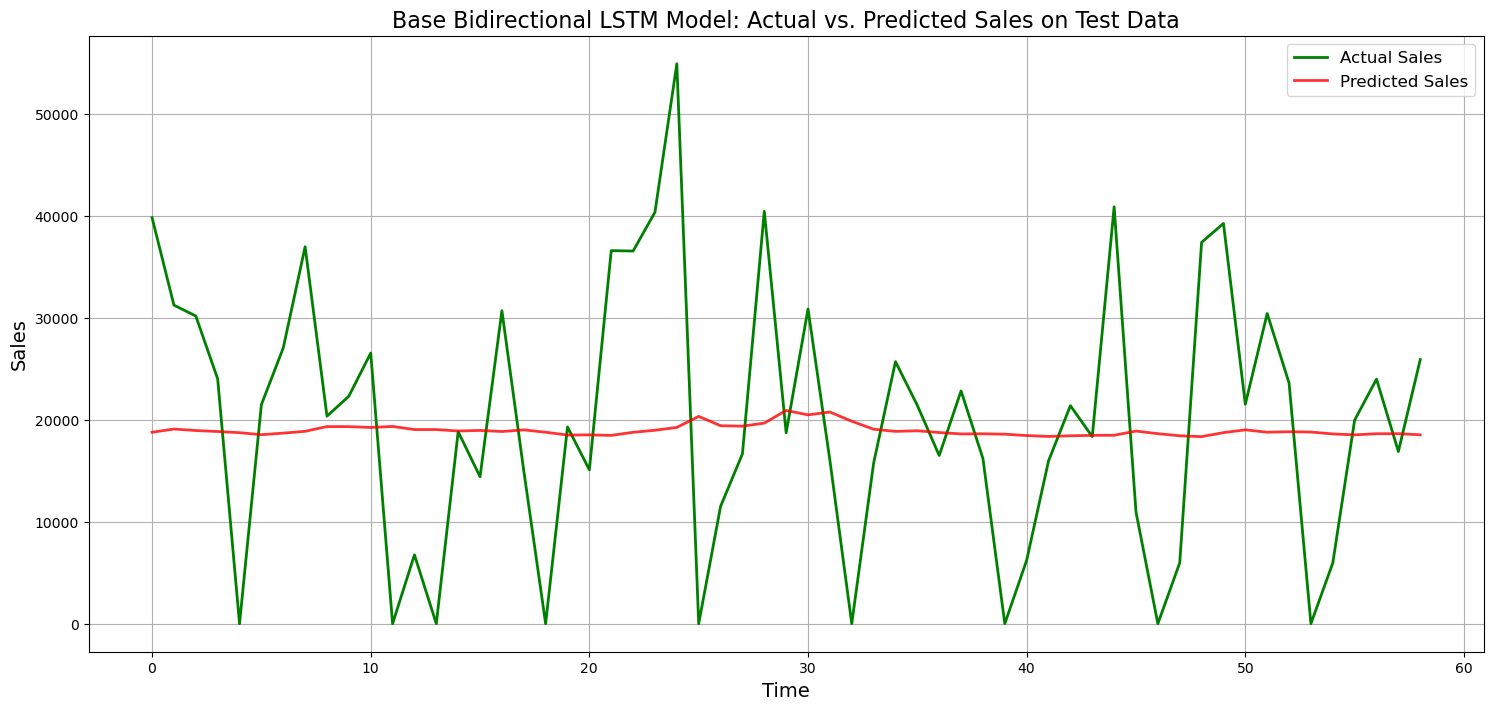

In [86]:
plt.figure(figsize=(18,8))
plt.plot(y_test_original, label="Actual Sales", color='g', linewidth=2)
plt.plot(y_pred_original, label="Predicted Sales", color='r', linewidth=2, alpha=0.8)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.title("Base Bidirectional LSTM Model: Actual vs. Predicted Sales on Test Data", fontsize=16)
plt.legend(fontsize=12)
plt.grid()

In [87]:
non_zero_mask = y_test_original != 0  # Mask to filter out zero values
mape = np.mean(np.abs((y_test_original[non_zero_mask] - y_pred_original[non_zero_mask]) / y_test_original[non_zero_mask])) * 100
print(f"Mape : {mape}")

Mape : 42.911887137159425


## **Moving Average on Sales Data for Filtered Data**

**Data is resampled daily. It means if some dates are missing in the data those are added in the data and sales are assigned as 0.**

In [88]:
df_uk_prices_daily = df[df['Country'] == 'United Kingdom']
df_uk_prices_daily = df_uk_prices_daily.groupby('InvoiceDate')[['Sales']].sum()
df_uk_prices_daily = df_uk_prices_daily[['Sales']].resample('D').sum()
df_uk_prices_daily

,Sales
InvoiceDate,
2009-12-01,47668.86
2009-12-02,55875.26
2009-12-03,72820.90
2009-12-04,37966.35
2009-12-05,9042.36
...,...
2011-12-05,85331.87
2011-12-06,52484.19
2011-12-07,55214.81


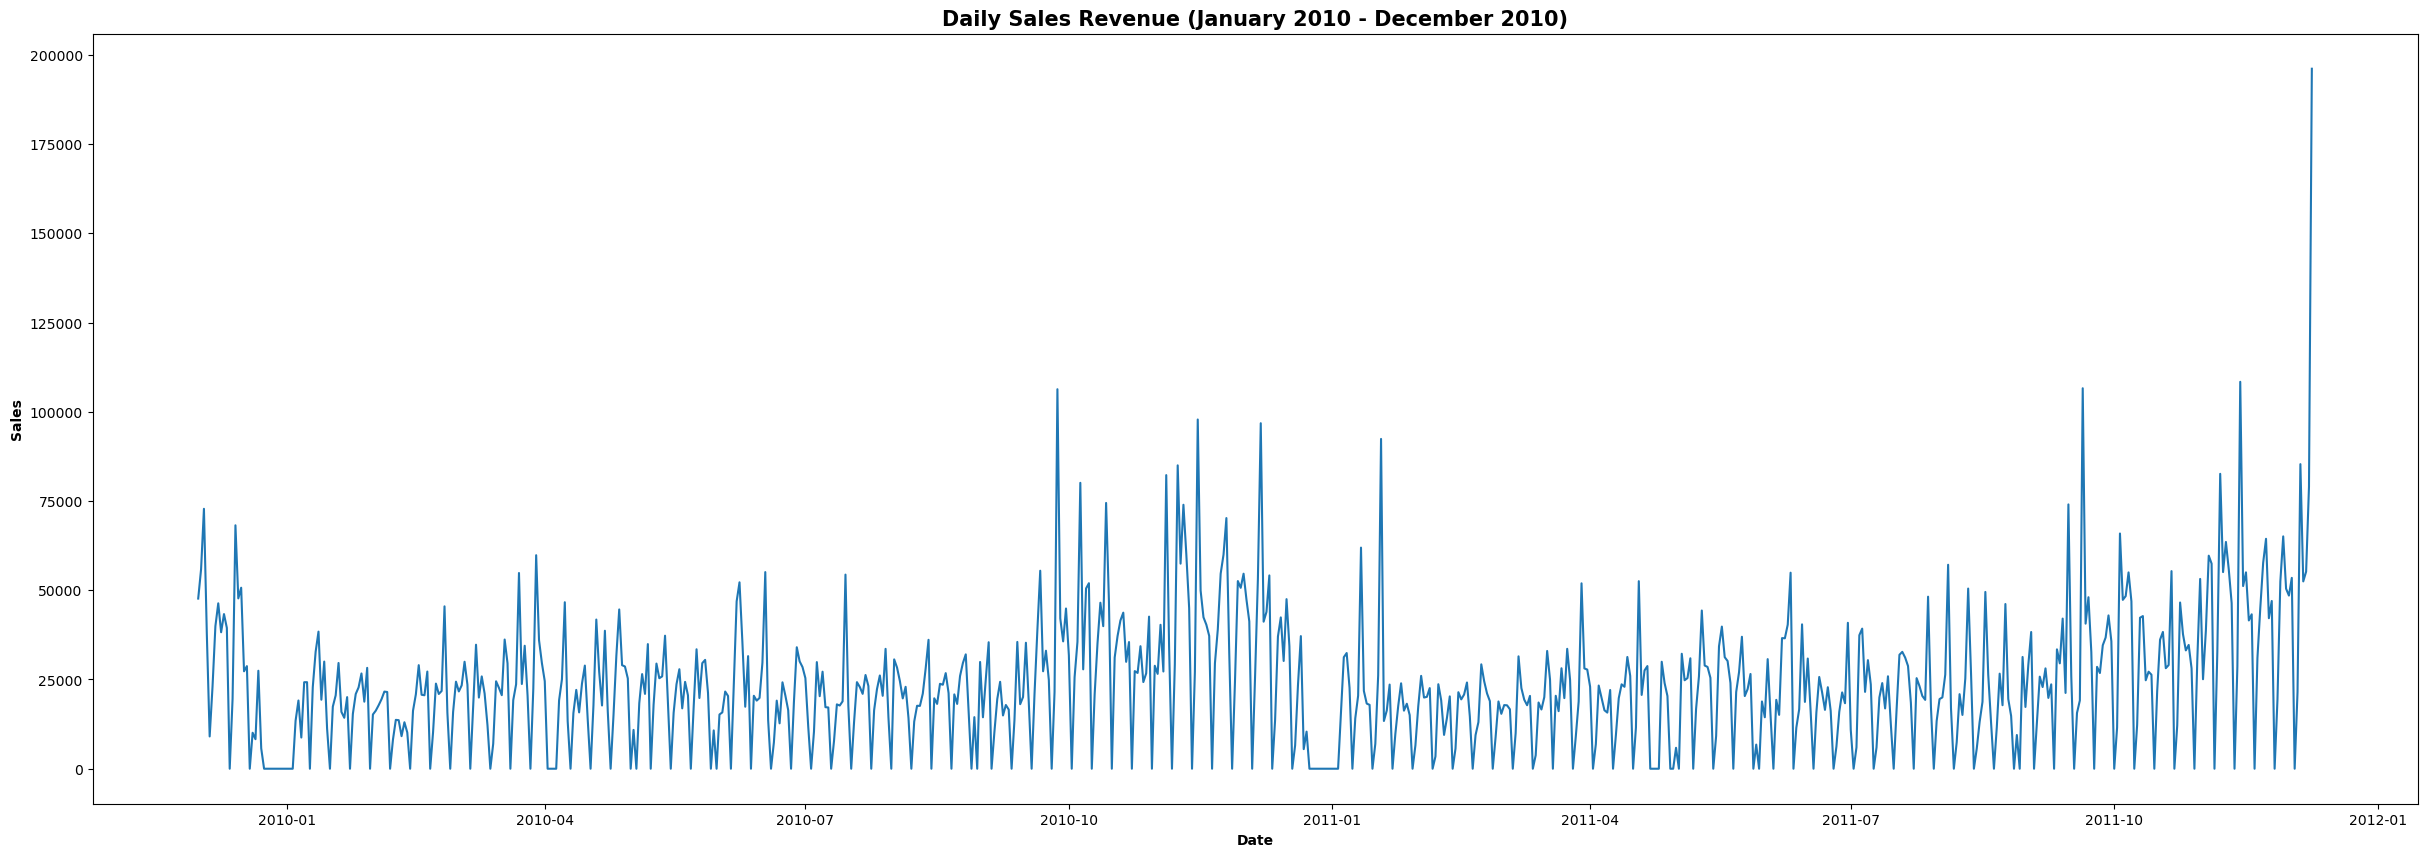

In [89]:
plt.figure(figsize=(30, 10))
plt.plot(df_uk_prices_daily.index, df_uk_prices_daily['Sales'])
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Daily Sales Revenue (January 2010 - December 2010)', fontsize=15, fontweight='bold')
plt.show()

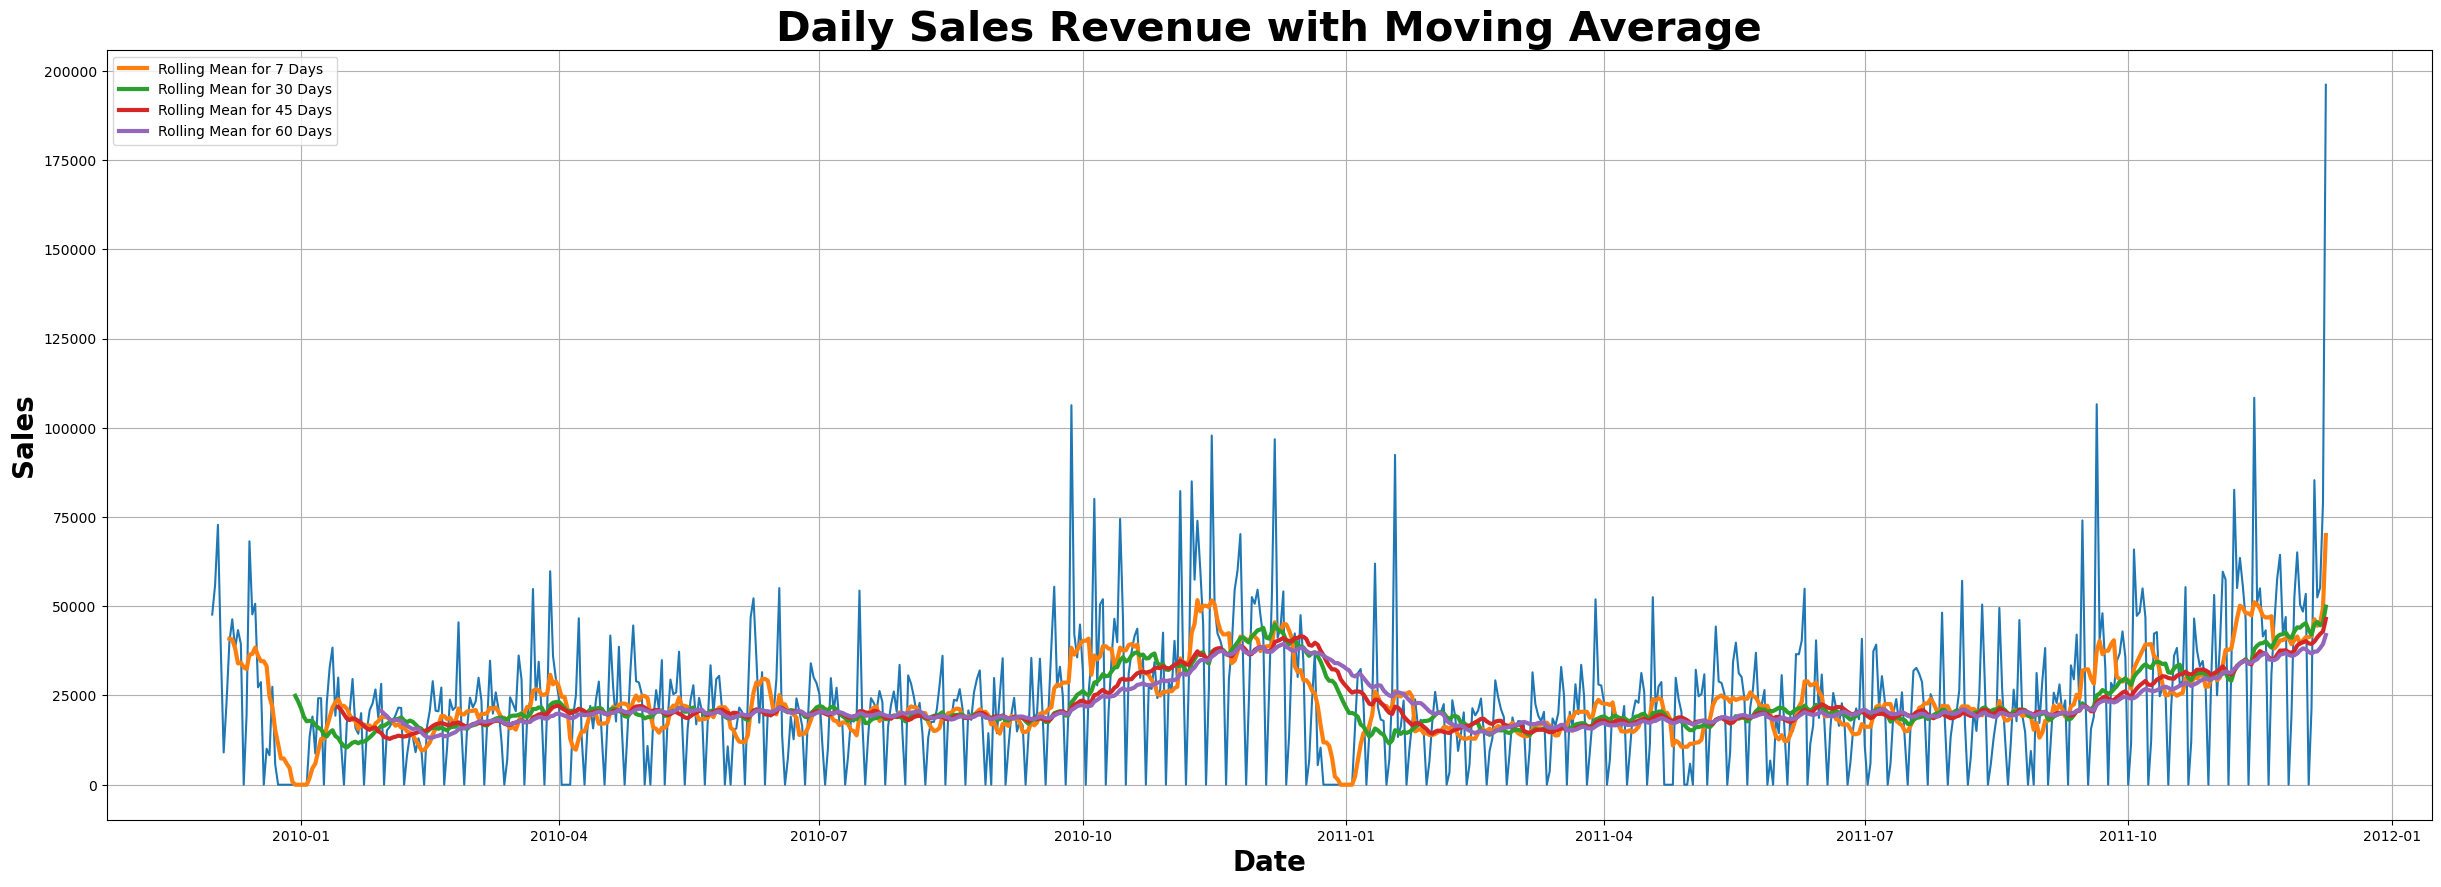

In [90]:
plt.figure(figsize=(30, 10))
plt.plot(df_uk_prices_daily.index, df_uk_prices_daily['Sales'])
plt.plot(df_uk_prices_daily.index, df_uk_prices_daily['Sales'].rolling(7).mean(), label = "Rolling Mean for 7 Days", linewidth=3)
plt.plot(df_uk_prices_daily.index, df_uk_prices_daily['Sales'].rolling(30).mean(), label = "Rolling Mean for 30 Days", linewidth=3)
plt.plot(df_uk_prices_daily.index, df_uk_prices_daily['Sales'].rolling(45).mean(), label = "Rolling Mean for 45 Days", linewidth=3)
plt.plot(df_uk_prices_daily.index, df_uk_prices_daily['Sales'].rolling(60).mean(), label = "Rolling Mean for 60 Days", linewidth=3)
plt.xlabel('Date', fontsize=20, fontweight='bold')
plt.ylabel('Sales', fontsize=20, fontweight='bold')
plt.title('Daily Sales Revenue with Moving Average', fontsize=30, fontweight='bold')
plt.grid()
plt.legend()
plt.show()

**Data is again resampled on weekly basis. If any week is missing those week are added to the dataset and sales are assigned 0 for those missing weeks**

In [91]:
df_uk_prices_weekly = df_uk_prices_daily[['Sales']].resample('W').sum()

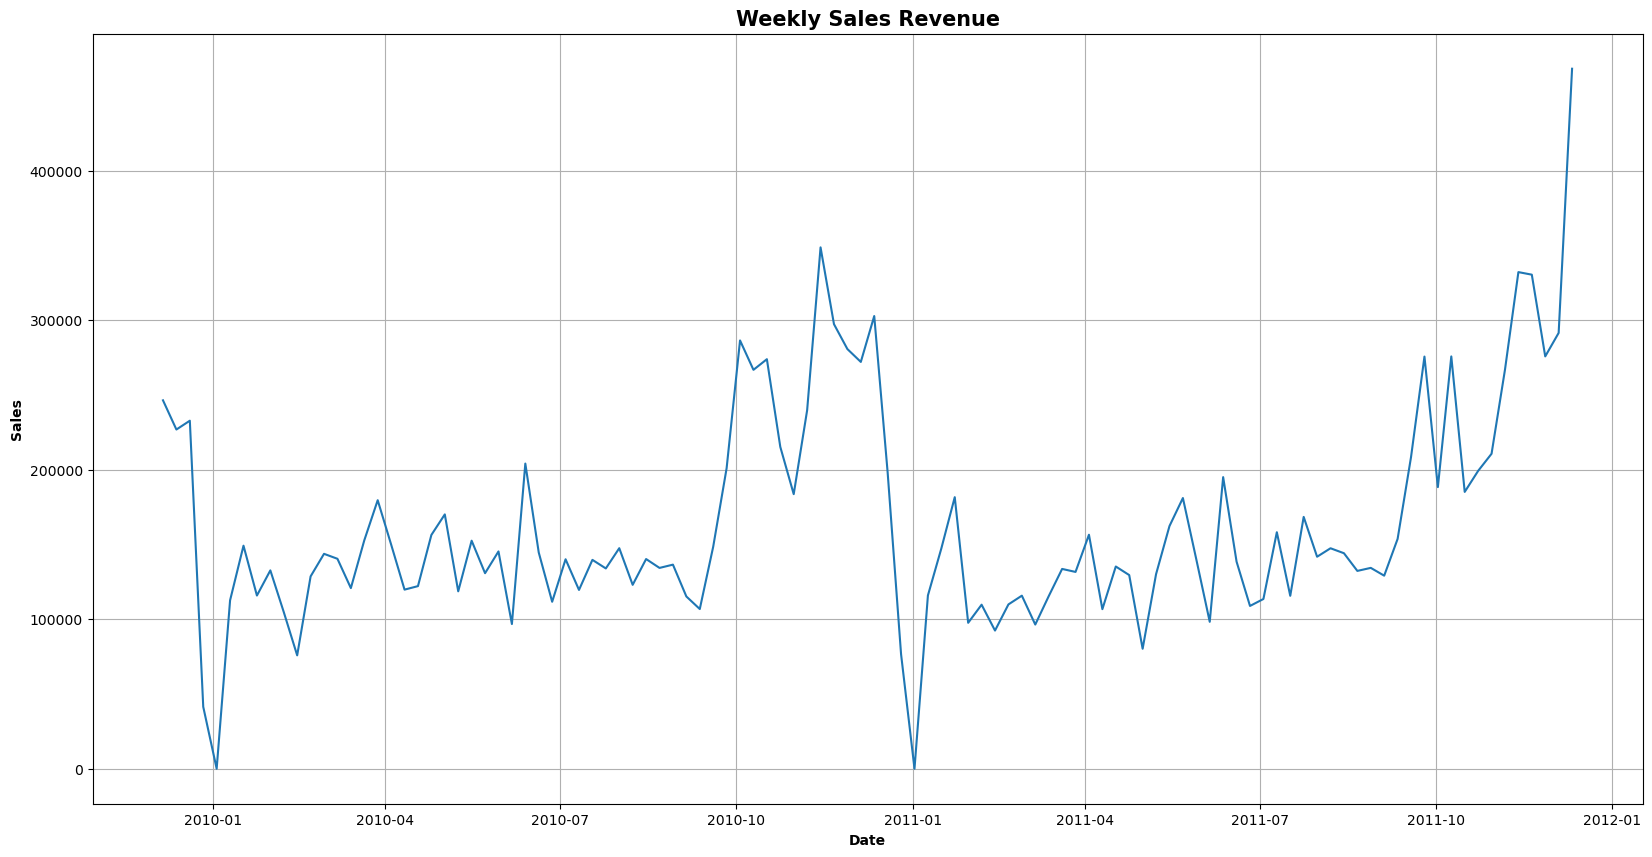

In [92]:
plt.figure(figsize=(20, 10))
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'])
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Weekly Sales Revenue', fontsize=15, fontweight='bold')
plt.grid()
plt.show()

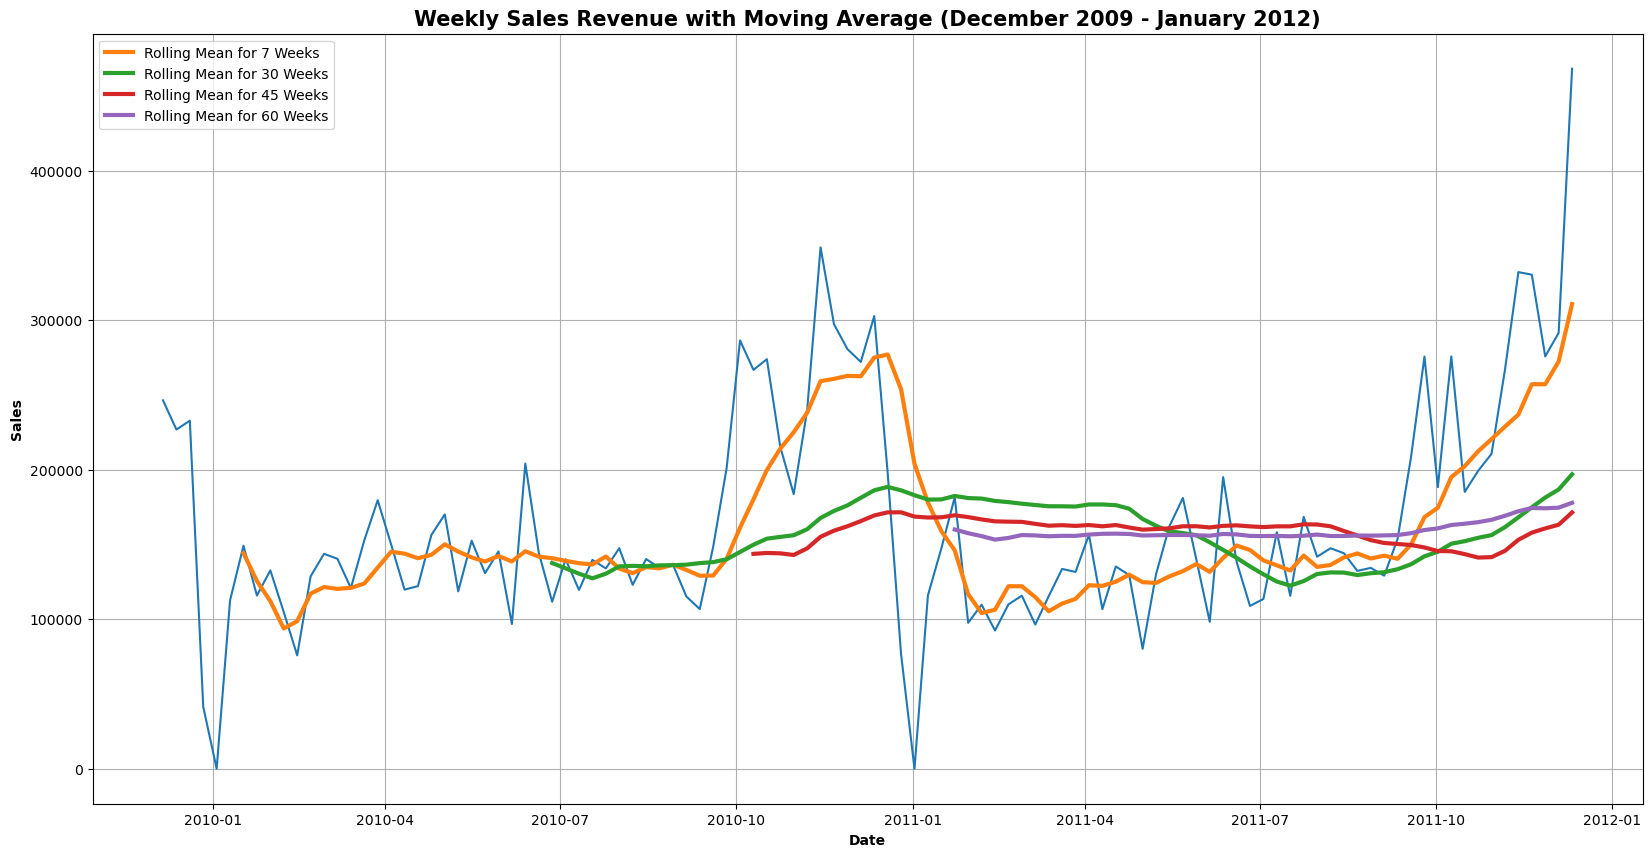

In [93]:
plt.figure(figsize=(20, 10))
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'])
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(7).mean(), label = "Rolling Mean for 7 Weeks", linewidth=3)
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(30).mean(), label = "Rolling Mean for 30 Weeks", linewidth=3)
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(45).mean(), label = "Rolling Mean for 45 Weeks", linewidth=3)
plt.plot(df_uk_prices_weekly.index, df_uk_prices_weekly['Sales'].rolling(60).mean(), label = "Rolling Mean for 60 Weeks", linewidth=3)
plt.xlabel('Date', fontsize=10, fontweight='bold')
plt.ylabel('Sales', fontsize=10, fontweight='bold')
plt.title('Weekly Sales Revenue with Moving Average (December 2009 - January 2012)', fontsize=15, fontweight='bold')
plt.grid()
plt.legend()
plt.show()

### **Power Spectral Density and Frequency Spectrum and Autocorrelation of the data**

**For this analysis, resampling it not done**

In [94]:
df_uk_2 = df[df['Country'] == 'United Kingdom'].copy()  
df_uk_2.loc[:, 'InvoiceDate'] = df_uk_2['InvoiceDate'].dt.normalize()
df_uk_2 = df_uk_2.groupby('InvoiceDate', as_index=True)[['Sales']].sum()
df_uk_2.head()

,Sales
InvoiceDate,
2009-12-01,47668.86
2009-12-02,55875.26
2009-12-03,72820.90
2009-12-04,37966.35
2009-12-05,9042.36


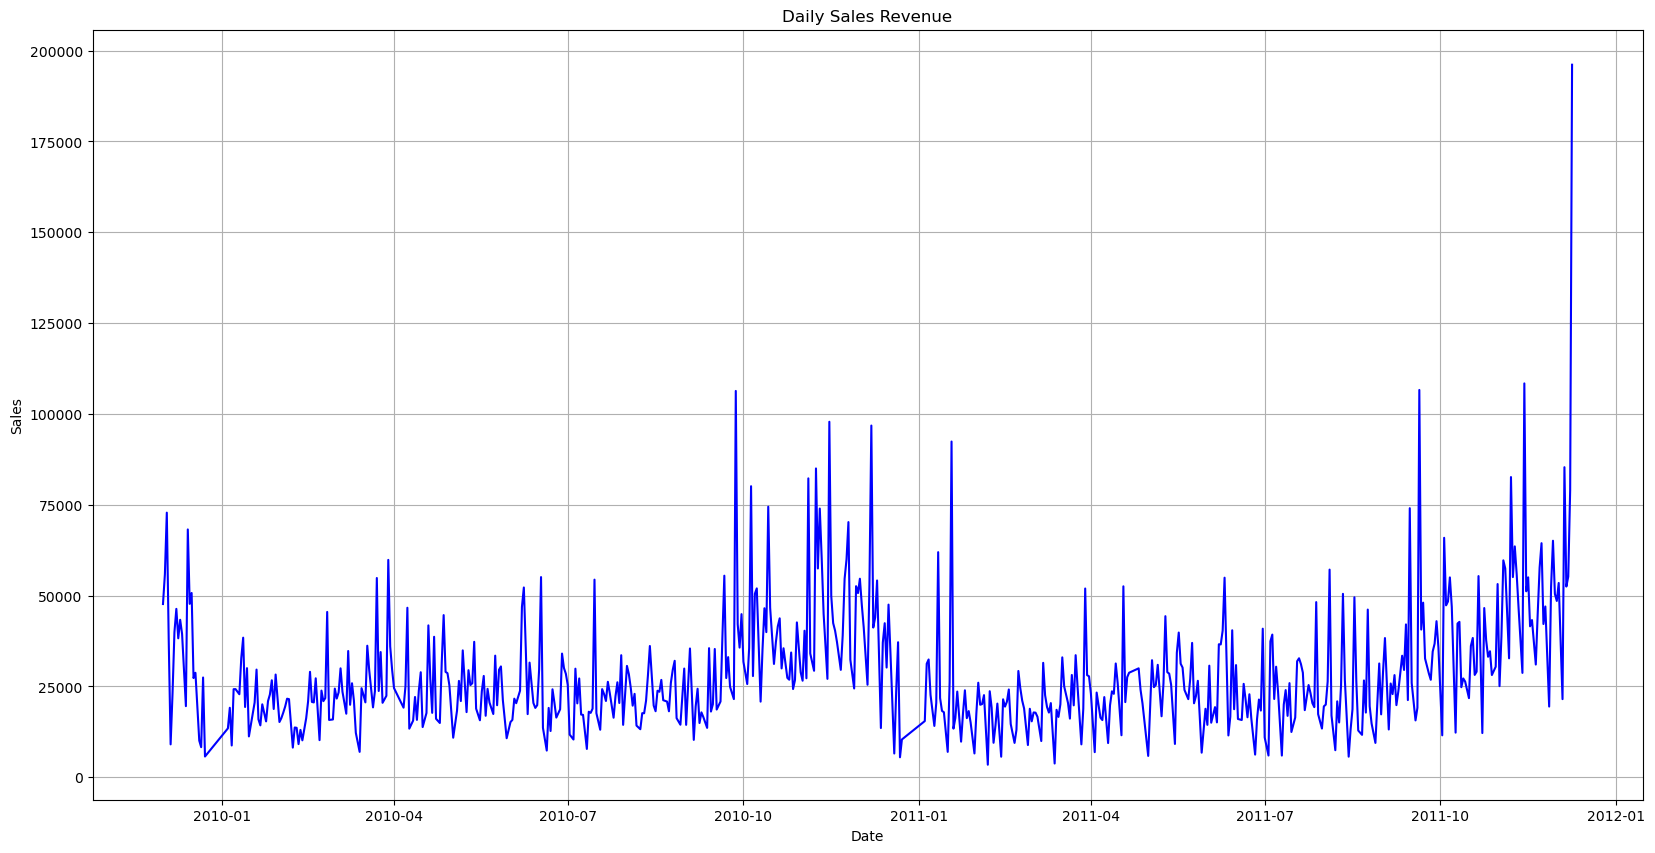

In [95]:
plt.figure(figsize=(20, 10))
plt.plot(df_uk_2.index, df_uk_2['Sales'], color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Revenue')
plt.grid()
plt.show()

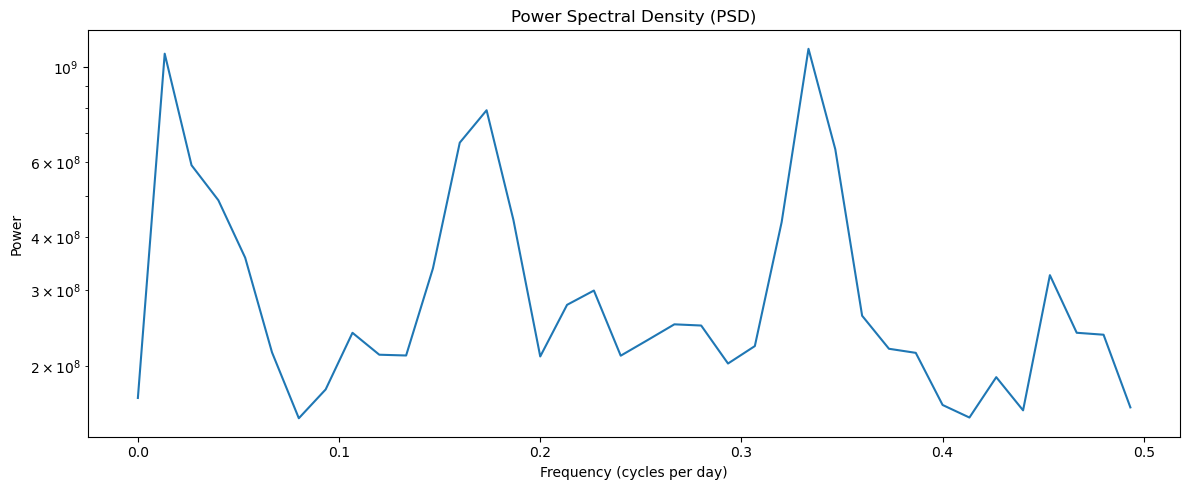

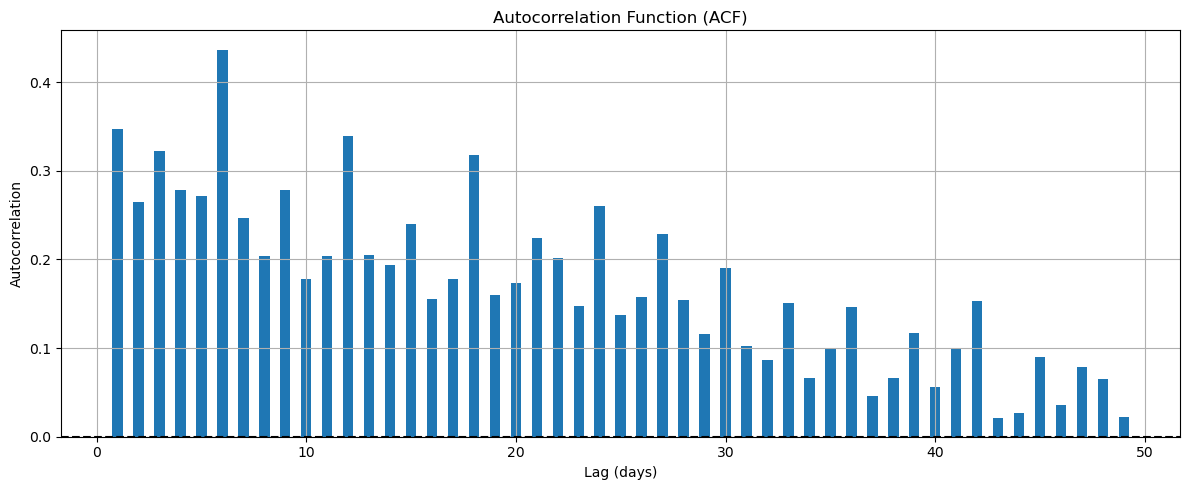

In [96]:
from scipy.signal import welch
from statsmodels.tsa.stattools import acf

sales_series = df_uk_2['Sales']
frequencies, psd = welch(sales_series, fs=1, nperseg=len(sales_series)//8)


lags = np.arange(1, 50)
autocorr_values = acf(sales_series, nlags=lags[-1])


plt.figure(figsize=(12, 5))
plt.semilogy(frequencies, psd)
plt.title("Power Spectral Density (PSD)")
plt.xlabel("Frequency (cycles per day)")
plt.ylabel("Power")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.bar(lags, autocorr_values[1:], width=0.5)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag (days)")
plt.ylabel("Autocorrelation")
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()

plt.tight_layout()
plt.show()

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">
Strong Peaks at Low Frequencies:   
This suggests a dominant long-term trend or seasonality in the data (e.g., a weekly or monthly sales cycle).  
If the highest peak occurs at f = 0.14, the period would be 1 / 0.14 ≈ 7 days → indicating a weekly pattern in sales.  

Multiple Peaks at Different Frequencies:  
Could indicate multiple periodic components (e.g., daily and weekly patterns combined).  
A peak near f = 0.3 corresponds to a 3-4 day cycle in sales behavior.  

Noise at High Frequencies (Right Side):  
Lower power values at high frequencies suggest random fluctuations rather than meaningful cycles.  

<div style="background-color: #fff9c4; padding: 10px; border-radius: 1px; border: 1px solid #d3d3d3;">
    
    •	Strong Autocorrelation at Low Lags (1-10 days)  
	•	Indicates that sales today are significantly influenced by sales in the past week.  
	•	Suggests a short-term dependence (e.g., weekend spikes or weekday effects).  
	•	Peaks around Lags ~7, ~14, ~21, etc.  
	•	These spikes indicate a weekly seasonality in sales (consistent buying patterns every 7 days).  
	•	Matches the PSD analysis, which showed strong low-frequency components.  
	•	Gradual Decay of Autocorrelation  
	•	As lag increases, the correlation weakens, meaning sales further in the past have less impact on today’s sales.  
	•	This is typical in time series where recent values influence current trends more than older ones.  
	•	Smaller Secondary Peaks at ~30 Days  
	•	Possible monthly trends in the data.  
	•	Could indicate that sales follow some recurring monthly pattern (e.g., payday effects, marketing campaigns).  

</div>

### **Different Smoothing techniques applied on the Data**

**No resampling is performed**

In [97]:
from scipy.signal import butter, filtfilt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

daily_sales_uk = df[df['Country'] == 'United Kingdom']
daily_sales_uk.loc[:, 'InvoiceDate'] = daily_sales_uk['InvoiceDate'].dt.normalize()
daily_sales_uk = daily_sales_uk.rename(columns={
    'InvoiceDate':'ds',
    'Sales':'y'
})
daily_sales_uk = daily_sales_uk.groupby('ds', as_index=True)[['y']].sum()
daily_sales_uk = daily_sales_uk.reset_index()

# Load your daily sales data (Ensure 'InvoiceDate' is a datetime column)
daily_sales_uk['ds'] = pd.to_datetime(daily_sales_uk['ds'])
daily_sales_uk = daily_sales_uk.sort_values('ds')

#### **Original Sales Plot**

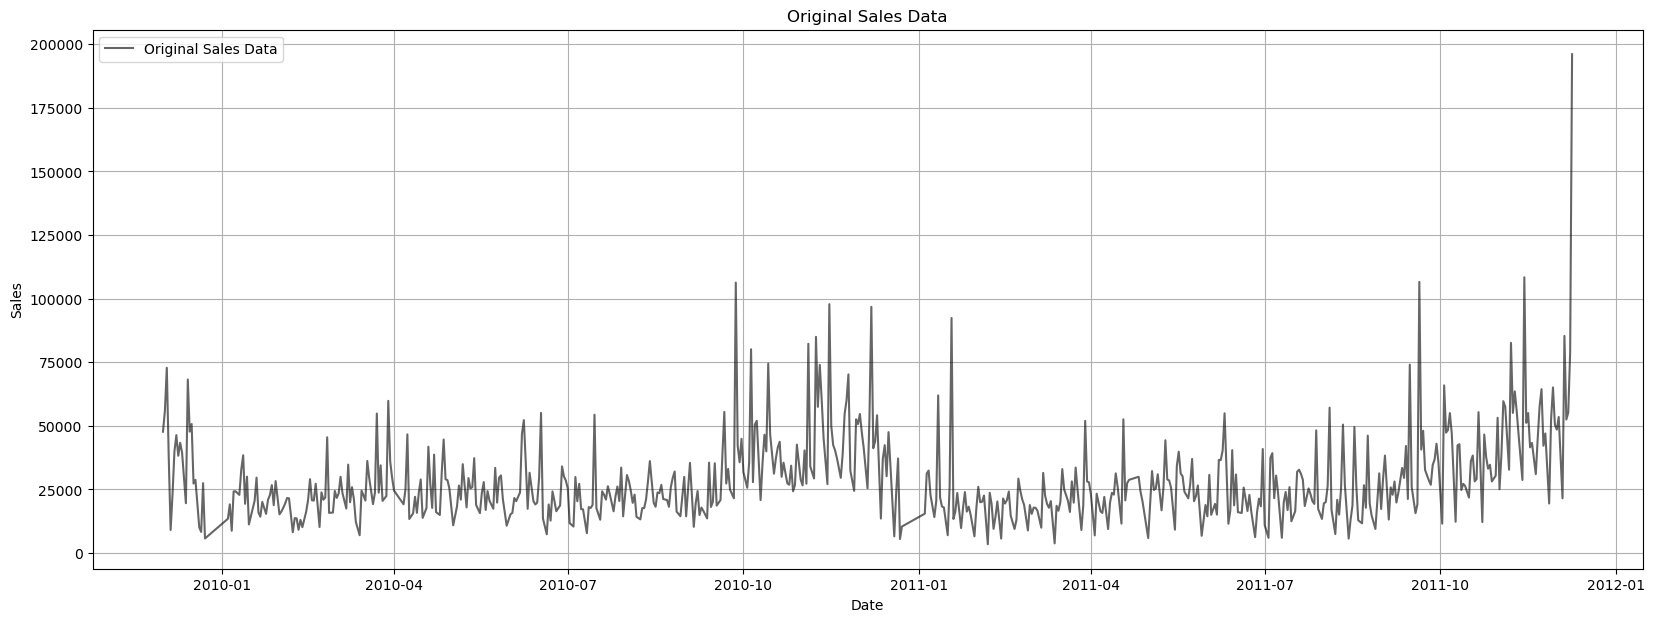

In [101]:
plt.figure(figsize=(20, 7))
plt.plot(daily_sales_uk['ds'], daily_sales_uk['y'], label="Original Sales Data", color='black', alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Original Sales Data")
plt.grid()
plt.legend()
plt.show()

#### **Sales Moving Average Plot**

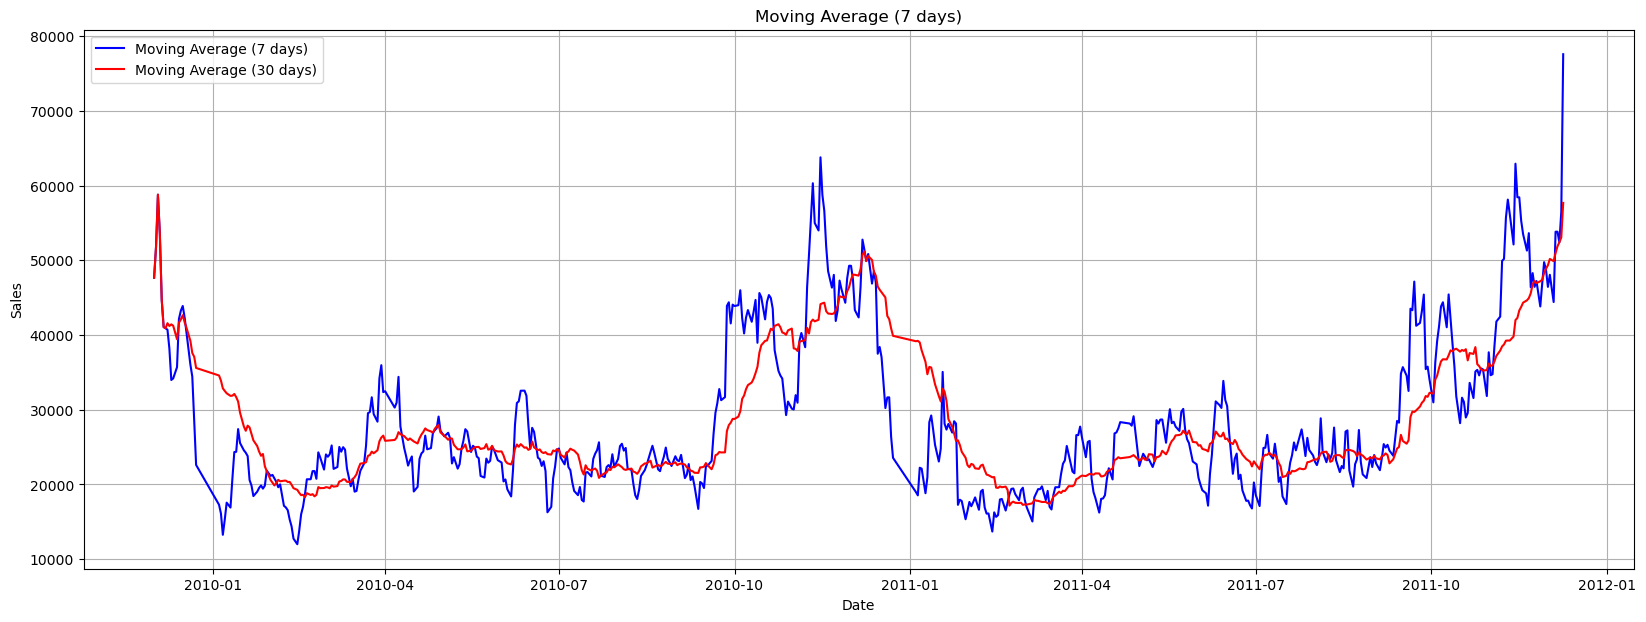

In [102]:
window_size = 7
plt.figure(figsize=(20, 7))
daily_sales_uk['MA_Sales'] = daily_sales_uk['y'].rolling(window=window_size, min_periods=1).mean()
plt.plot(daily_sales_uk['ds'], daily_sales_uk['MA_Sales'], label="Moving Average (7 days)", color='blue')
plt.plot(daily_sales_uk['ds'], daily_sales_uk['y'].rolling(window=30, min_periods=1).mean(), label="Moving Average (30 days)", color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Moving Average (7 days)")
plt.grid()
plt.legend()
plt.show()
# Exponential Smoothing (Alpha = 0.3)

#### **Exponential Smotting on Sales Data**

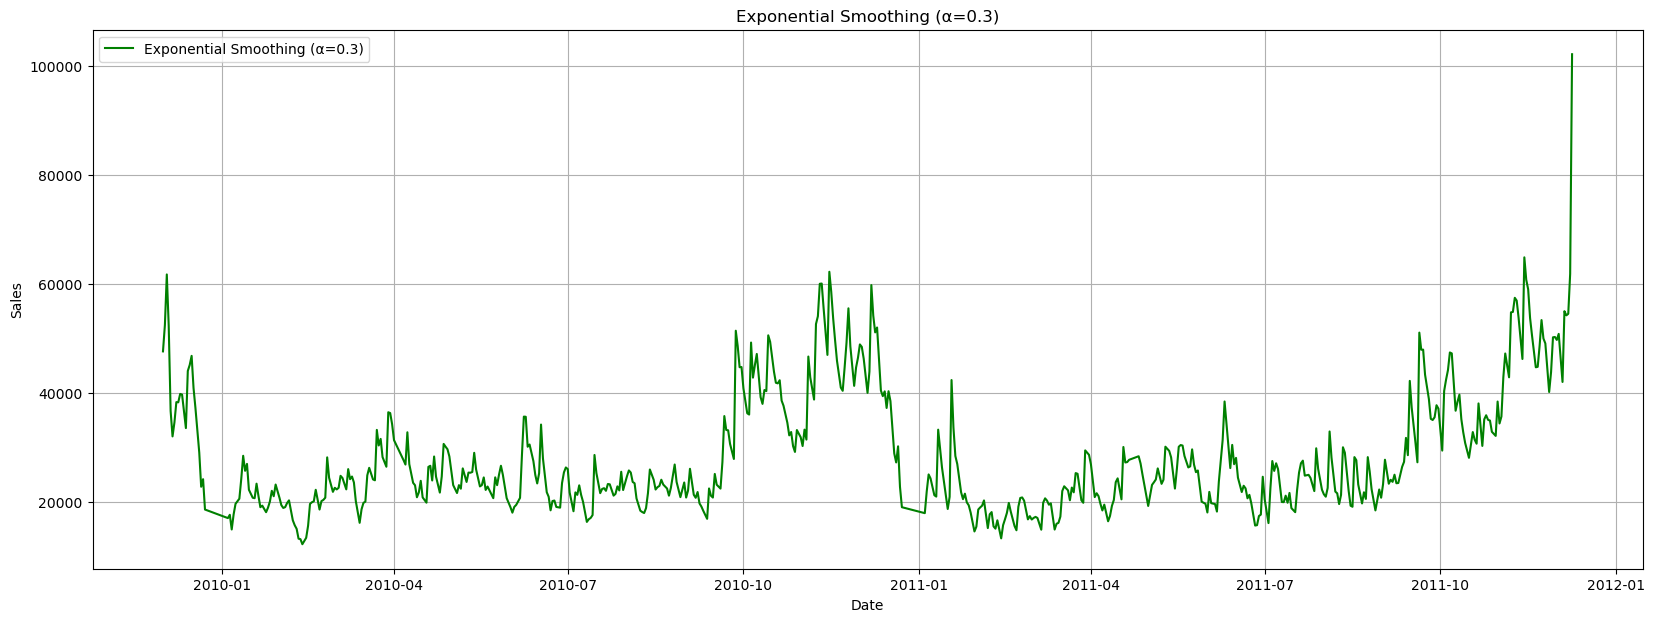

In [103]:
alpha = 0.3
plt.figure(figsize=(20, 7))
daily_sales_uk['Exp_Smooth_Sales'] = daily_sales_uk['y'].ewm(alpha=alpha).mean()
plt.plot(daily_sales_uk['ds'], daily_sales_uk['Exp_Smooth_Sales'], label="Exponential Smoothing (α=0.3)", color='green')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Exponential Smoothing (α=0.3)")
plt.grid()
plt.legend()
plt.show()

#### **Application of Butterworth Low Pass Filter on Sales Data**

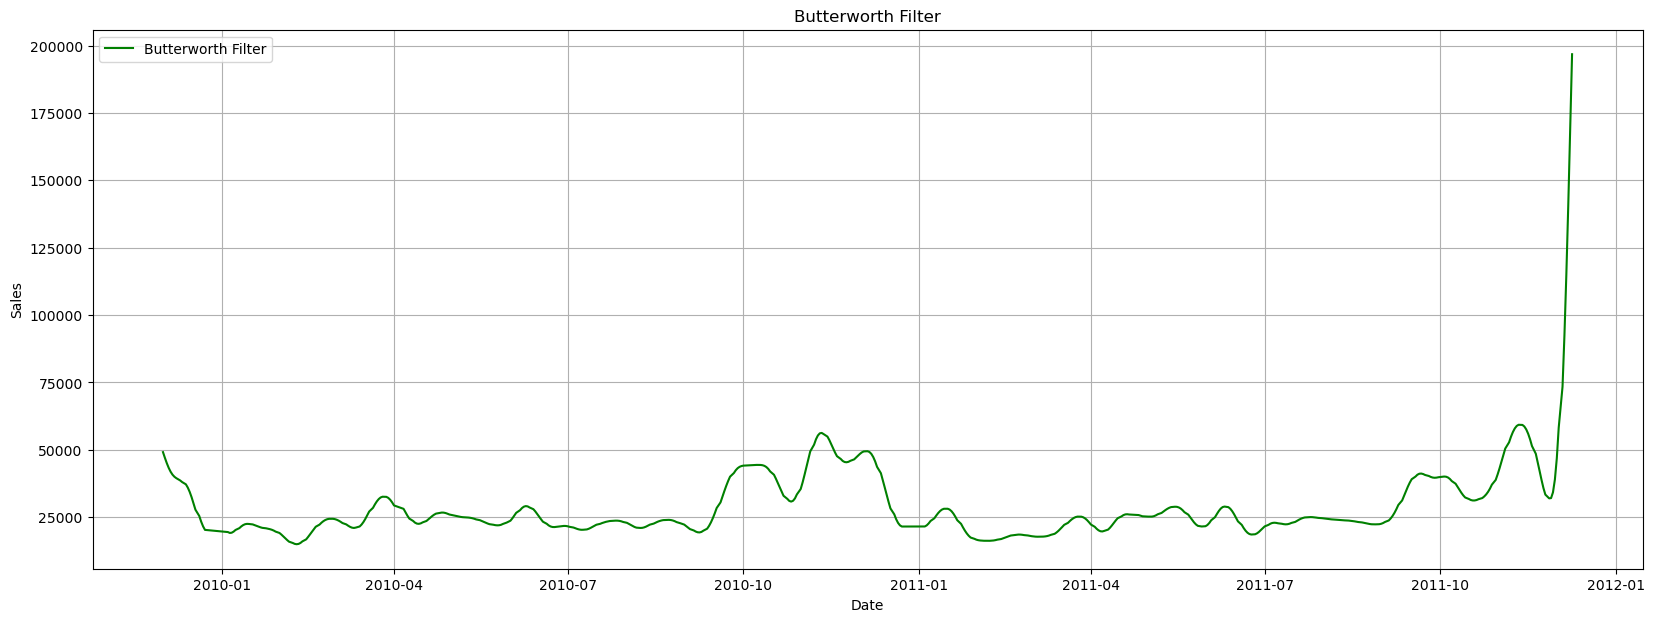

In [104]:
def butterworth_filter(data, cutoff=0.1, order=3):
    b, a = butter(order, cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

plt.figure(figsize=(20, 7))
daily_sales_uk['Butter_Sales'] = butterworth_filter(daily_sales_uk['y'])
plt.plot(daily_sales_uk['ds'], daily_sales_uk['Butter_Sales'], label="Butterworth Filter", color='green')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Butterworth Filter")
plt.grid()
plt.legend()
plt.show()

#### **Holt and Winter's Exponential Smooting on Sales Data**

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


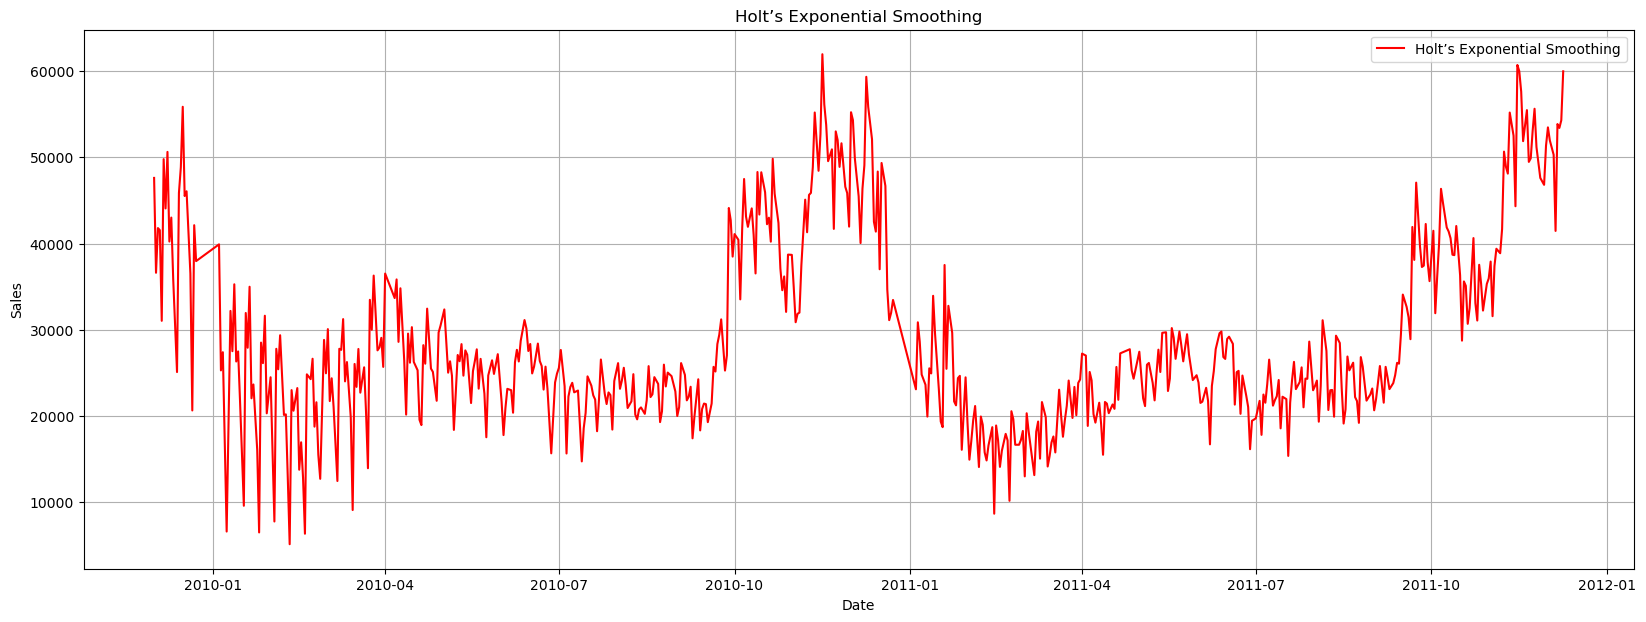

In [105]:
holt_model = ExponentialSmoothing(
    daily_sales_uk['y'],
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Specify the number of periods in a season (e.g., for yearly seasonality)
).fit()
daily_sales_uk['Holt_Sales'] = holt_model.fittedvalues
plt.figure(figsize=(20, 7))
plt.plot(daily_sales_uk['ds'], daily_sales_uk['Holt_Sales'], label="Holt’s Exponential Smoothing", color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Holt’s Exponential Smoothing")
plt.grid()
plt.legend()
plt.show()

### **Better Bidirectional LSTM Model**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [107]:
daily_sales_lstm = daily_sales_uk[['ds', 'y']]
daily_sales_lstm.head()

,ds,y
0,2009-12-01,47668.86
1,2009-12-02,55875.26
2,2009-12-03,72820.90
3,2009-12-04,37966.35
4,2009-12-05,9042.36


**Instead of using raw data directly as input to the LSTM Model. We are applying moving average smooting on the data to reduce fluctuations on the data and help the model to learn the patterns in the better way** 

In [109]:
scaler = MinMaxScaler(feature_range=(0, 1))
daily_sales_lstm.loc[:, 'y'] = daily_sales_lstm['y'].rolling(window=7, min_periods=1).mean()
daily_sales_lstm.loc[:, 'y'] = scaler.fit_transform(daily_sales_lstm[['y']])

In [110]:
def create_sequences(data, time_steps=90):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [111]:
sales_data = daily_sales_lstm[['y']].values
time_steps = 60  
X, y = create_sequences(sales_data, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)  # 80% training, 20% testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [112]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(time_steps, 1)),
    Bidirectional(LSTM(256, return_sequences=True, activation='tanh')),
    Dropout(0.15),
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    Dropout(0.15),
    Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
    Dropout(0.15),
    Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
    Dropout(0.20),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation="linear")
])


optimizer = Adam(learning_rate=0.0003)  # Lower learning rate for stability

# Compile model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# *Step 7: Implement Early Stopping & Learning Rate Scheduler*
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00005)

In [113]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_15                │ (None, 60, 512)        │       528,384 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 60, 256)        │       656,384 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 60, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ (None, 128)            │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,458,817 (5.56 MB)

 Trainable params: 1,458,817 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
with tf.device('/CPU:0'):
    history = model.fit(X_train, y_train, 
                        epochs=250,  
                        batch_size=64,  
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, lr_reduction],
                        verbose=1)

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - loss: 0.1020 - val_loss: 0.1321 - learning_rate: 3.0000e-04
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0389 - val_loss: 0.0479 - learning_rate: 3.0000e-04
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0263 - val_loss: 0.0287 - learning_rate: 3.0000e-04
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 0.0201 - val_loss: 0.0343 - learning_rate: 3.0000e-04
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0188 - val_loss: 0.0161 - learning_rate: 3.0000e-04
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 0.0144 - val_loss: 0.0190 - learning_rate: 3.0000e-04
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - loss: 0.0123 - val_loss: 0.0213 - learning_rate: 3.0000e-04
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0107 - val_loss: 0.0145 - learning_rate: 3.0000e-04
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.0118 - val_loss: 0.0128 - learning_

In [117]:
y_pred = model.predict(X_test)

y_pred = y_pred[:len(y_test)]  # Ensure predictions match test set length

# *Step 10: Reverse Scaling*
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

2025-03-02 15:41:09.287478: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3c2f93240> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step


In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def compute_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    accuracy = 100 - mape

    metrics = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "Accuracy": accuracy
    }

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}{'%' if key in ['MAPE', 'Accuracy'] else ''}")

In [119]:
compute_error_metrics(y_test_original, y_pred_original)

MAE: 0.03
MSE: 0.00
RMSE: 0.04
MAPE: 9.03%
Accuracy: 90.97%


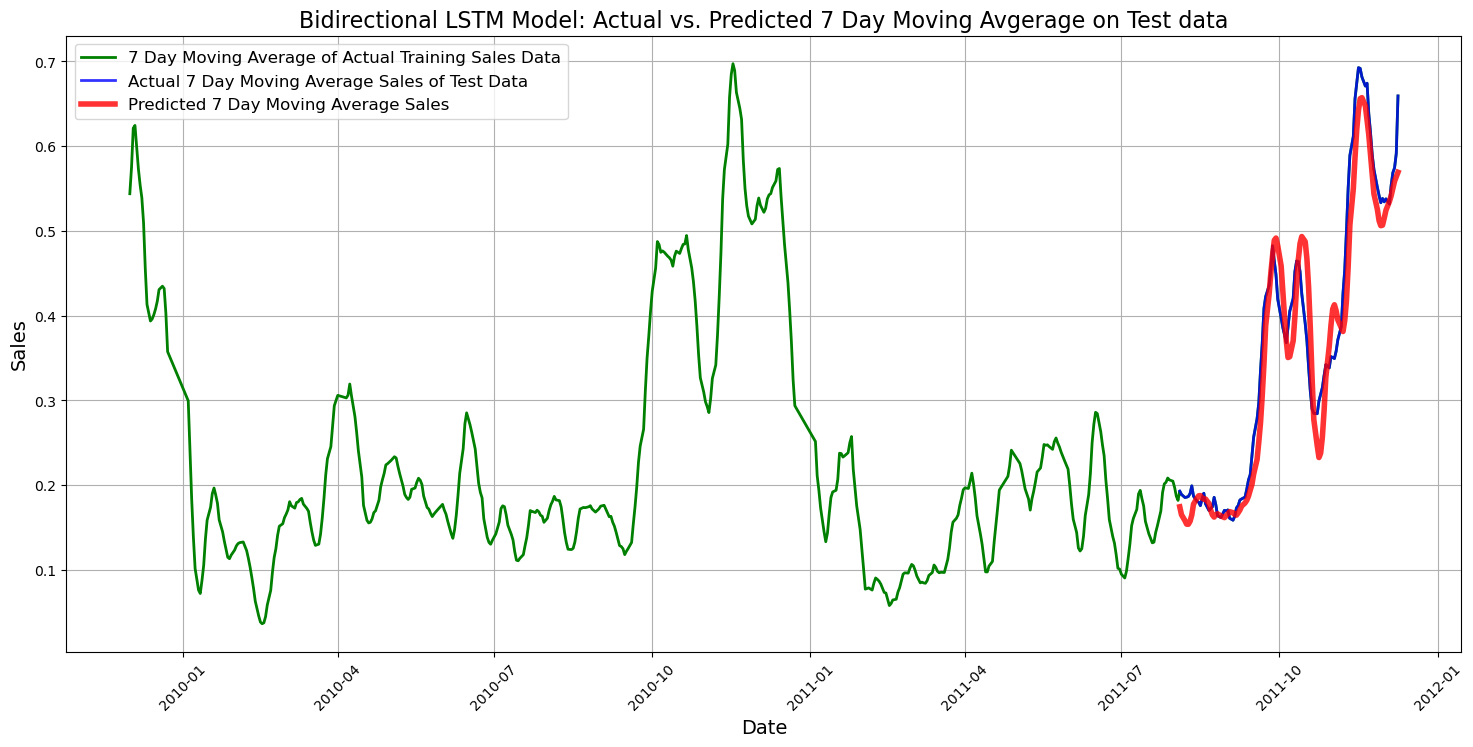

In [121]:
plt.figure(figsize=(18,8))
date_range = daily_sales_lstm['ds'].iloc[-len(y_test_original):]
plt.plot(daily_sales_lstm['ds'], scaler.inverse_transform(daily_sales_lstm[['y']]), 
         label="7 Day Moving Average of Actual Training Sales Data", color='g', linewidth=2)
plt.plot(date_range, y_test_original, label="Actual 7 Day Moving Average Sales of Test Data", color='b', linewidth=2, alpha=0.8)
plt.plot(date_range, y_pred_original, label="Predicted 7 Day Moving Average Sales", color='r', linewidth=4, alpha=0.8)
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Sales", fontsize=14)
plt.title("Bidirectional LSTM Model: Actual vs. Predicted 7 Day Moving Avgerage on Test data", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [232]:
split_arrays_X_test = np.array_split(X_test, 4, axis=0)
split_arrays_y_test = np.array_split(y_test, 4, axis=0)

In [233]:
error_spread = {}
def split_and_predict(deep_model, scaler_method, X, y, date_range_start, date_range_end, period):
    predict_result = model.predict(X)

    predict_original = scaler_method.inverse_transform(predict_result.reshape(-1, 1))
    actual_original = scaler_method.inverse_transform(y.reshape(-1, 1))

    plt.figure(figsize=(18,8))
    date_range = daily_sales_lstm['ds'].iloc[date_range_start:date_range_end]
    plt.plot(date_range, actual_original, label="Actual 7 Day Moving Average Sales of Test Data", color='b', linewidth=2, alpha=0.8)
    plt.plot(date_range, predict_original, label="Predicted 7 Day Moving Average Sales", color='r', linewidth=4, alpha=0.8)
    
    plt.xlabel("Date", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Sales", fontsize=14)
    plt.title(f"Period {period} : {date_range.iloc[0].strftime('%Y-%m-%d')}  -  {date_range.iloc[-1].strftime('%Y-%m-%d')}", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

    error_spread['Period ' + period + f": {date_range.iloc[0].strftime('%Y-%m-%d')} - {date_range.iloc[-1].strftime('%Y-%m-%d')}"] = actual_original - predict_original

    return predict_original, actual_original, date_range

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


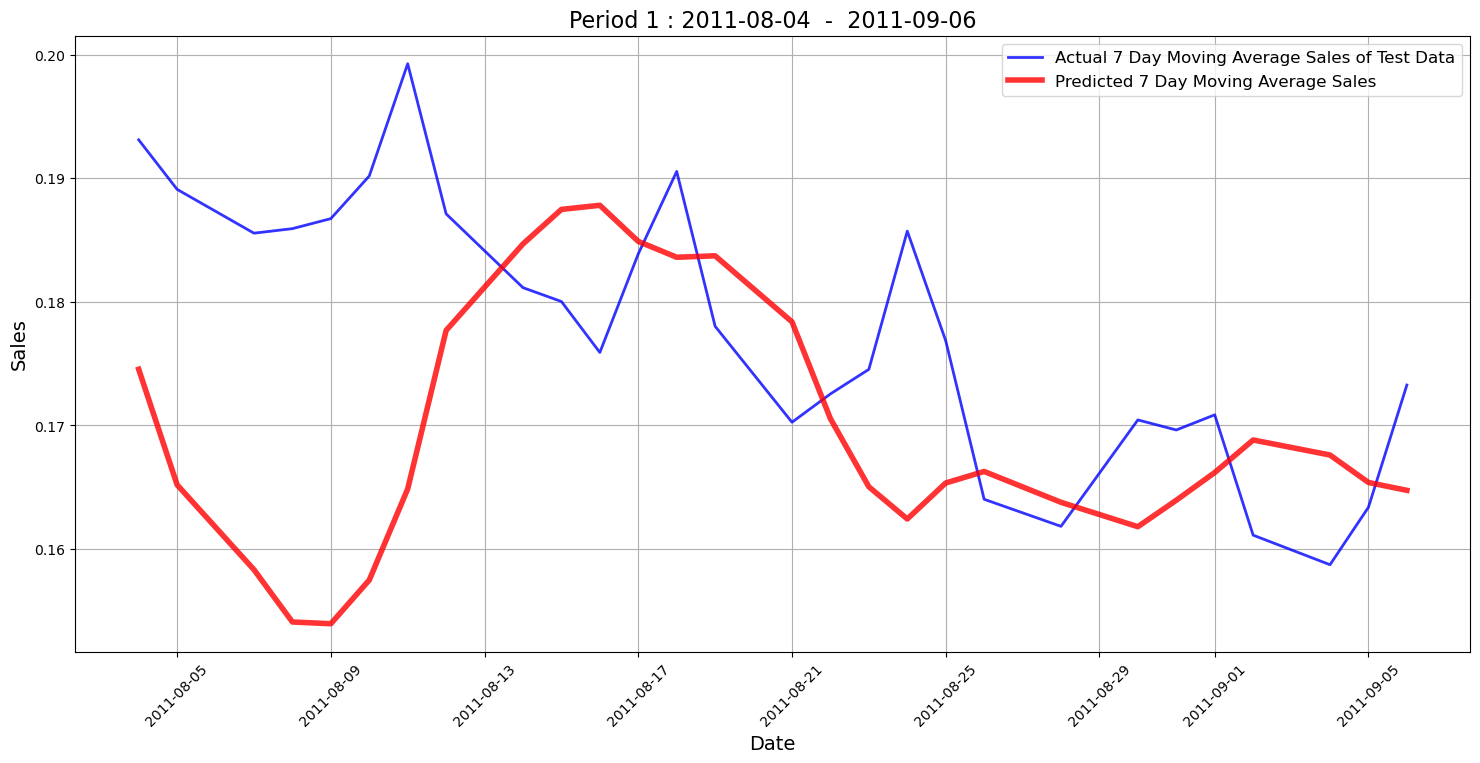

In [234]:
y_p, y_t, date_range = split_and_predict(deep_model=model,
                  scaler_method = scaler,
                  X = split_arrays_X_test[0],
                  y = split_arrays_y_test[0],
                  date_range_start = -len(y_test_original),
                  date_range_end = -len(y_test_original) + len(split_arrays_y_test[0]),
                  period = '1'
                 )

In [235]:
print(f"For Period 1 - {date_range.iloc[0].strftime('%Y-%m-%d')} - {date_range.iloc[-1].strftime('%Y-%m-%d')} \n")
compute_error_metrics(y_t, y_p)

For Period 1 - 2011-08-04 - 2011-09-06 

MAE: 0.01
MSE: 0.00
RMSE: 0.02
MAPE: 6.86%
Accuracy: 93.14%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


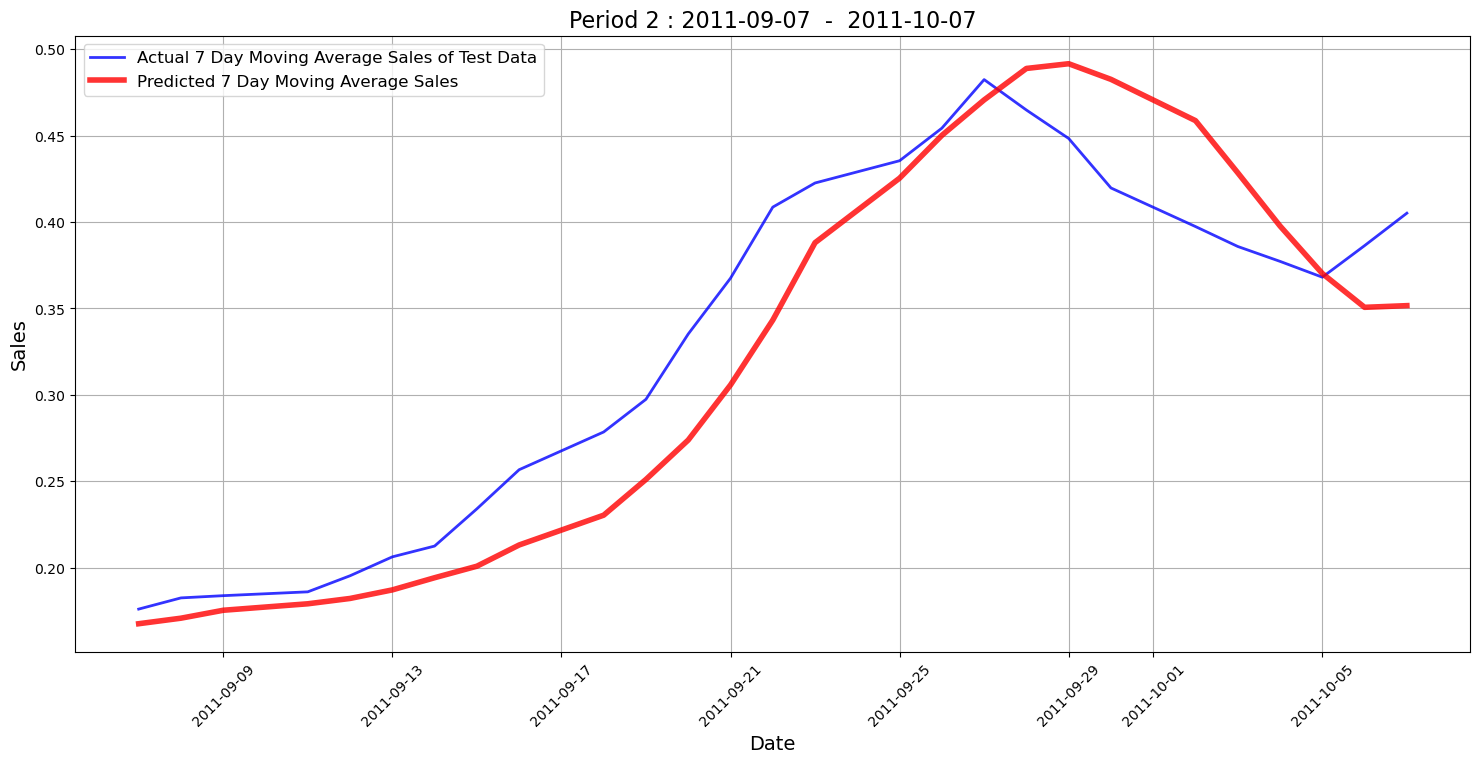

In [236]:
y_p, y_t, date_range = split_and_predict(deep_model=model,
                                          scaler_method = scaler,
                                          X = split_arrays_X_test[1],
                                          y = split_arrays_y_test[1],
                                          date_range_start = -len(y_test_original) + len(split_arrays_y_test[0]),
                                          date_range_end = -len(y_test_original) + len(split_arrays_y_test[0]) + len(split_arrays_y_test[1]),
                                          period = '2'
                                         )

In [237]:
print(f"For Period 2 - {date_range.iloc[0].strftime('%Y-%m-%d')} - {date_range.iloc[-1].strftime('%Y-%m-%d')} \n")
compute_error_metrics(y_t, y_p)

For Period 2 - 2011-09-07 - 2011-10-07 

MAE: 0.03
MSE: 0.00
RMSE: 0.04
MAPE: 9.55%
Accuracy: 90.45%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


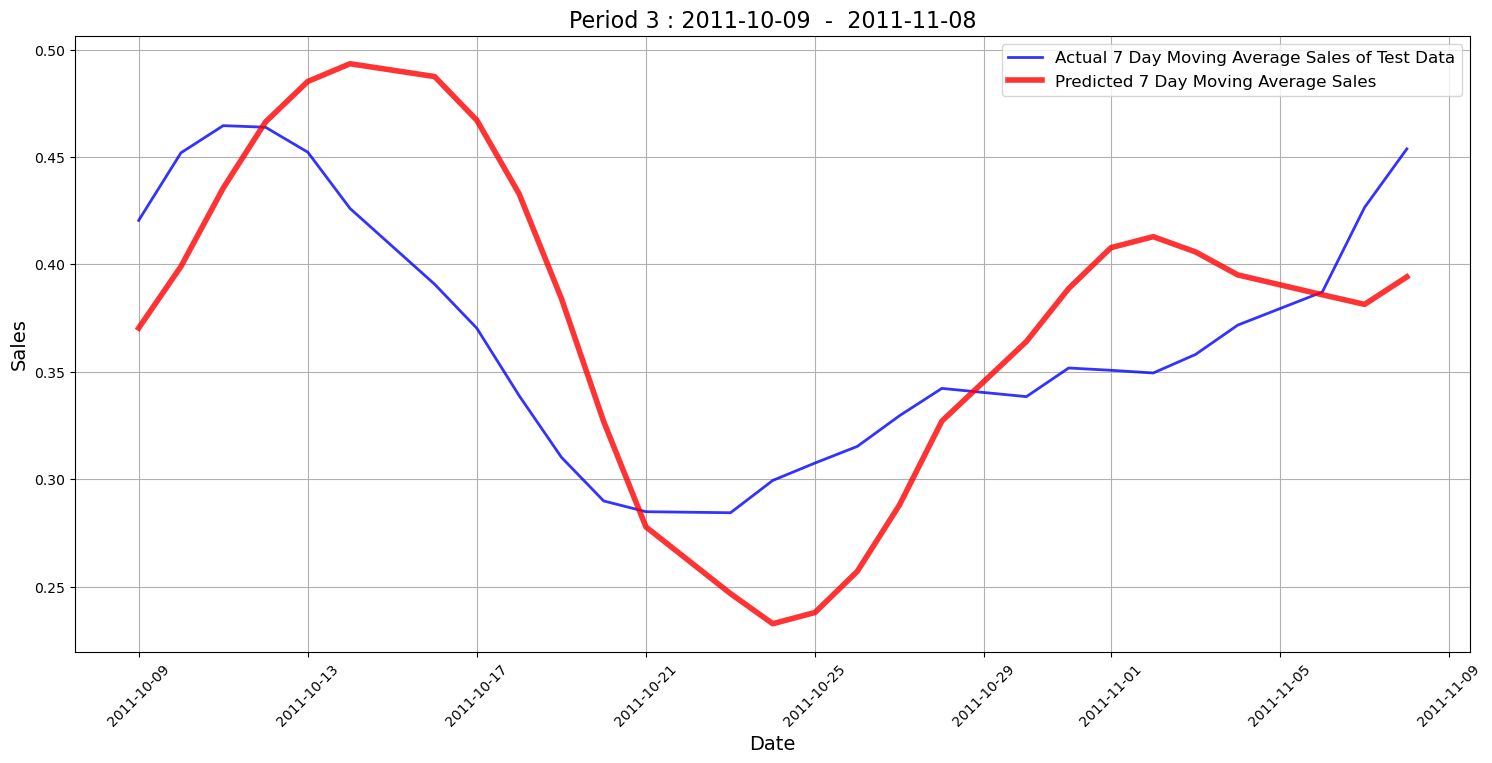

In [238]:
y_p, y_t, date_range = split_and_predict(deep_model=model,
                                          scaler_method = scaler,
                                          X = split_arrays_X_test[2],
                                          y = split_arrays_y_test[2],
                                          date_range_start = -len(y_test_original) + len(split_arrays_y_test[0]) + len(split_arrays_y_test[1]),
                                          date_range_end = -len(y_test_original) + len(split_arrays_y_test[0]) + len(split_arrays_y_test[1]) + len(split_arrays_y_test[2]),
                                          period = '3'
                                         )

In [239]:
print(f"For Period 3 - {date_range.iloc[0].strftime('%Y-%m-%d')} - {date_range.iloc[-1].strftime('%Y-%m-%d')} \n")
compute_error_metrics(y_t, y_p)

For Period 3 - 2011-10-09 - 2011-11-08 

MAE: 0.05
MSE: 0.00
RMSE: 0.05
MAPE: 13.37%
Accuracy: 86.63%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


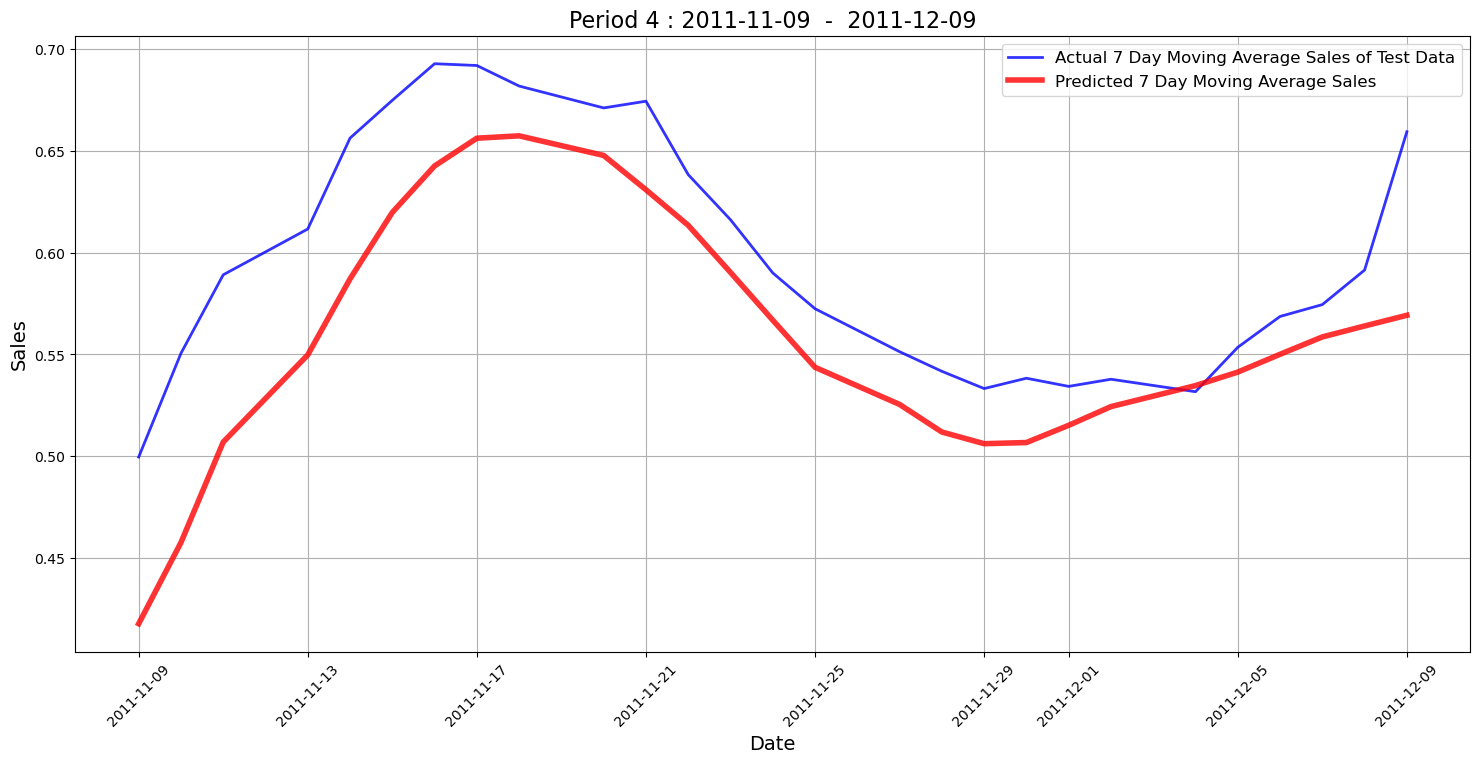

In [240]:
y_p, y_t, date_range = split_and_predict(deep_model=model,
                                          scaler_method = scaler,
                                          X = split_arrays_X_test[3],
                                          y = split_arrays_y_test[3],
                                          date_range_start = -len(y_test_original) + len(split_arrays_y_test[0]) + len(split_arrays_y_test[1]) + len(split_arrays_y_test[2]),
                                          date_range_end = None,
                                          period = '4'
                                         )

In [241]:
print(f"For Period 4 - {date_range.iloc[0].strftime('%Y-%m-%d')} - {date_range.iloc[-1].strftime('%Y-%m-%d')} \n")
compute_error_metrics(y_t, y_p)

For Period 4 - 2011-11-09 - 2011-12-09 

MAE: 0.04
MSE: 0.00
RMSE: 0.05
MAPE: 6.41%
Accuracy: 93.59%


In [242]:
import seaborn as sns
error_spread = {key: value.flatten().tolist() for key, value in error_spread.items()}

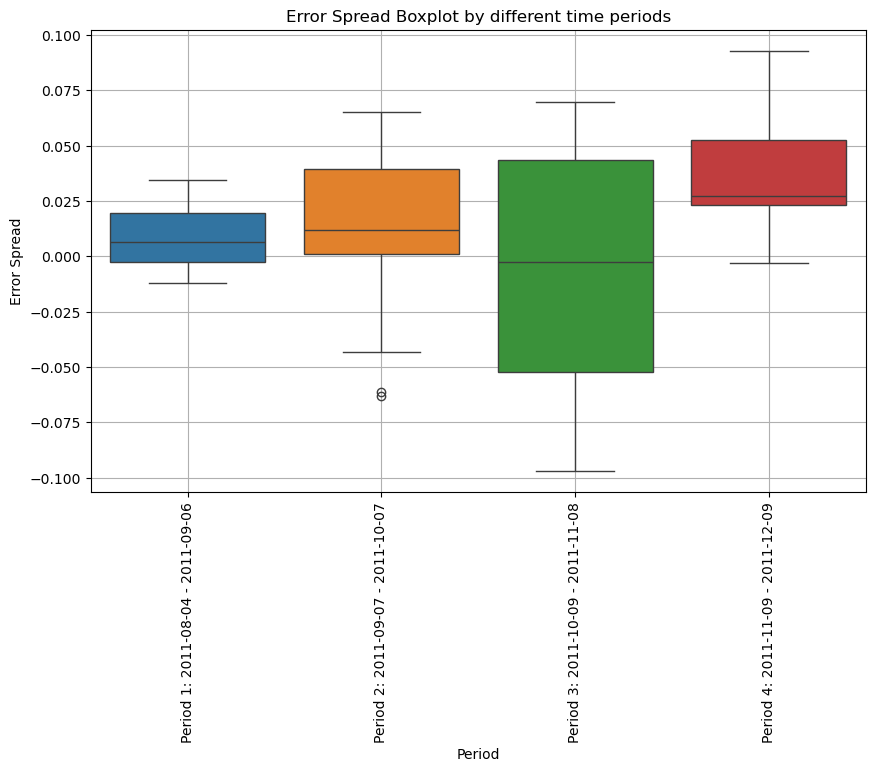

In [246]:
data = []
periods = []
for period, errors in error_spread.items():
    data.extend(errors)
    periods.extend([period] * len(errors))

df = pd.DataFrame({'Period': periods, 'Error Spread': data})

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Error Spread', hue='Period', data=df)
plt.title("Error Spread Boxplot by different time periods")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [259]:
import ray
from ray import tune
from ray.tune.schedulers import ASHAScheduler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
print("Using CPU only. GPU is disabled.")

# Define Early Stopping and Learning Rate Reduction Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.00005)

Using CPU only. GPU is disabled.


In [260]:
def build_and_train_model(config):
    model_t = Sequential([
        Input(shape=(time_steps, 1)),  # Input Shape
        Bidirectional(LSTM(config["units_1"], return_sequences=True, activation='tanh')),
        Dropout(config["dropout_1"]),

        Bidirectional(LSTM(config["units_2"], return_sequences=True, activation='tanh')),
        Dropout(config["dropout_2"]),

        Bidirectional(LSTM(config["units_3"], return_sequences=True, activation='tanh')),
        Dropout(config["dropout_3"]),

        Bidirectional(LSTM(config["units_4"], return_sequences=False, activation='relu')),
        Dropout(config["dropout_4"]),

        Dense(config["dense_1"], activation='relu'),
        Dense(config["dense_2"], activation='relu'),
        Dense(1, activation="linear")
    ])

    optimizer = Adam(learning_rate=config["learning_rate"])
    model_t.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model on CPU
    with tf.device('/CPU:0'):
        history = model_t.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=250,
            batch_size=config["batch_size"],
            callbacks=[early_stopping, lr_reduction],
            verbose=1
        )

    # Report Best Validation Loss
    tune.report(val_loss=min(history.history['val_loss']))
    return model_t

In [261]:
search_space = {
    "units_1": tune.choice([128, 256, 512]),
    "units_2": tune.choice([64, 128, 256]),
    "units_3": tune.choice([32, 64, 128]),
    "units_4": tune.choice([32, 64, 128]),
    "dropout_1": tune.uniform(0.1, 0.3),
    "dropout_2": tune.uniform(0.1, 0.3),
    "dropout_3": tune.uniform(0.1, 0.3),
    "dropout_4": tune.uniform(0.15, 0.3),
    "dense_1": tune.choice([32, 64, 128]),
    "dense_2": tune.choice([16, 32, 64]),
    "learning_rate": tune.loguniform(1e-4, 1e-2),
    "batch_size": tune.choice([16, 32, 64])
}

ray.init(ignore_reinit_error=True, num_gpus=0)

2025-03-02 16:58:23,260	INFO worker.py:1649 -- Calling ray.init() again after it has already been called.


Python version:,3.12.7
Ray version:,2.38.0
Dashboard:,http://127.0.0.1:8265


In [262]:
# Run Hyperparameter Tuning
tuner = tune.Tuner(
    tune.with_parameters(build_and_train_model),  # Pass the training function
    param_space=search_space,
    tune_config=tune.TuneConfig(
        metric="val_loss",
        mode="min",
        scheduler=ASHAScheduler(max_t=50, grace_period=10, reduction_factor=2),
        num_samples=20  # Number of trials
    )
)

# Run Tuning Process
results = tuner.fit()

(build_and_train_model pid=66953) 2025-03-02 16:58:42.739969: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=66953) 2025-03-02 16:58:42.740052: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=66953) 2025-03-02 16:58:42.740077: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=66953) 2025-03-02 16:58:42.740108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=66953) 2025-03-02 16:58:42.740131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(build_and_train_model pid=66951) Epoch 1/250


(build_and_train_model pid=66953) 2025-03-02 16:58:44.819594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=66951) 2025-03-02 16:58:44.781938: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:37 4s/step - loss: 0.1011
 2/28 ━━━━━━━━━━━━━━━━━━━━ 11s 430ms/step - loss: 0.1087
 2/14 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.1008
2/7 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - loss: 0.0948
 3/14 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - loss: 0.1022
 3/28 ━━━━━━━━━━━━━━━━━━━━ 14s 569ms/step - loss: 0.1076
(build_and_train_model pid=66956) Epoch 1/250 [repeated 7x across cluster]
 4/14 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - loss: 0.1002
 5/14 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - loss: 0.0976
 6/14 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - loss: 0.0951
 7/14 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - loss: 0.0927
1/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - loss: 0.0886 [repeated 7x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 15s 605ms/step - loss: 0.0803 [repeated 2x across cluster]
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - loss: 0.0782 [repeated 7x across cluster]
2/7 ━━━━━━━━━━━━━━━━━━━━ 3s 683ms/step - loss: 0.0740
12/28 ━━━━━━━━━━━━━━━━━━━━ 7s 488ms/step - loss: 0.0612 [repea

2025-03-02 17:02:27,517	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00002
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

4/7 ━━━━━━━━━━━━━━━━━━━━ 2s 951ms/step - loss: 0.0115 [repeated 3x across cluster]
(build_and_train_model pid=66956) Epoch 16/250 [repeated 3x across cluster]
17/28 ━━━━━━━━━━━━━━━━━━━━ 6s 598ms/step - loss: 0.0084 [repeated 28x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 947ms/step - loss: 0.0013 - val_loss: 0.0155 - learning_rate: 8.7033e-04
5/7 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step - loss: 0.0111 [repeated 6x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 892ms/step - loss: 0.0105 - val_loss: 0.0125 - learning_rate: 0.0031
 1/14 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.0483
10/28 ━━━━━━━━━━━━━━━━━━━━ 9s 553ms/step - loss: 0.0017  [repeated 13x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.0445 - val_loss: 0.1165 - learning_rate: 0.0037
1/7 ━━━━━━━━━━━━━━━━━━━━ 4s 672ms/step - loss: 0.0130
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 577ms/step - loss: 0.0031 - val_loss: 0.0071 - learning_rate: 3.4788e-04
(build_and_train_model pid=66953) Epoch 13/250 [repeated 4x across cluster]
18/

2025-03-02 17:02:49,633	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00006
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

 5/28 ━━━━━━━━━━━━━━━━━━━━ 10s 461ms/step - loss: 0.0087 [repeated 7x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - loss: 0.0080 - val_loss: 0.0115 - learning_rate: 0.0031
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 555ms/step - loss: 0.0024 [repeated 4x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 686ms/step - loss: 0.0030 - val_loss: 0.0082 - learning_rate: 4.1067e-04 [repeated 5x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - loss: 9.7483e-04
(build_and_train_model pid=66951) Epoch 15/250 [repeated 4x across cluster]
15/28 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - loss: 0.0085 [repeated 37x across cluster]
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - loss: 0.0088 [repeated 8x across cluster]
 5/28 ━━━━━━━━━━━━━━━━━━━━ 8s 375ms/step - loss: 9.9628e-04
 6/28 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - loss: 0.0011    
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 602ms/step - loss: 0.0088 - val_loss: 0.0149 - learning_rate: 0.0031
 2/28 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - loss: 0.0011  [repeated 2x across 

(build_and_train_model pid=67188) 2025-03-02 17:03:01.437462: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 [repeated 8x across cluster]
(build_and_train_model pid=67188) 2025-03-02 17:03:01.437576: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB [repeated 8x across cluster]
(build_and_train_model pid=67188) 2025-03-02 17:03:01.437612: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB [repeated 8x across cluster]
(build_and_train_model pid=67188) 2025-03-02 17:03:01.437679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support. [repeated 8x across cluster]
(build_and_train_model pid=67188) 2025-03-02 17:03:01.437765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GP

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 566ms/step - loss: 0.0084 - val_loss: 0.0069 - learning_rate: 0.0016
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 490ms/step - loss: 0.0047 - val_loss: 0.0043 - learning_rate: 1.5700e-04 [repeated 3x across cluster]
(build_and_train_model pid=66954) Epoch 43/250 [repeated 5x across cluster]
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - loss: 0.0017 [repeated 39x across cluster]
2/7 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - loss: 0.0077 [repeated 7x across cluster]


2025-03-02 17:03:04,643	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00007
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

 8/28 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - loss: 0.0061  [repeated 6x across cluster]
1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 577ms/step - loss: 0.0067
 1/28 ━━━━━━━━━━━━━━━━━━━━ 12s 456ms/step - loss: 9.4882e-04
 2/28 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - loss: 8.3640e-04 
 3/28 ━━━━━━━━━━━━━━━━━━━━ 9s 391ms/step - loss: 9.1890e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 596ms/step - loss: 0.0080 - val_loss: 0.0221 - learning_rate: 0.0016
 4/28 ━━━━━━━━━━━━━━━━━━━━ 8s 362ms/step - loss: 9.5614e-04
 5/28 ━━━━━━━━━━━━━━━━━━━━ 8s 348ms/step - loss: 9.7346e-04
 6/28 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - loss: 9.9290e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 566ms/step - loss: 0.0018 - val_loss: 0.0027 - learning_rate: 4.1067e-04 [repeated 3x across cluster]
 7/28 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - loss: 0.0010    
(build_and_train_model pid=66954) Epoch 44/250 [repeated 4x across cluster]
 8/28 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - loss: 0.0010 [repeated 39x across cluster]
4/7 ━━━━━━━━━━━━━━━━━━━━ 1s 466ms/step - loss: 

(build_and_train_model pid=67199) 2025-03-02 17:03:16.996951: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67199) 2025-03-02 17:03:16.997039: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67199) 2025-03-02 17:03:16.997060: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67199) 2025-03-02 17:03:16.997093: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67199) 2025-03-02 17:03:16.997129: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 4/28 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - loss: 0.0076  [repeated 3x across cluster]


(build_and_train_model pid=67188) 2025-03-02 17:03:17.725037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67188) 2025-03-02 17:03:17.761383: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


 2/28 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - loss: 8.0194e-04
 3/28 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - loss: 8.3927e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - loss: 0.0012 - val_loss: 0.0028 - learning_rate: 0.0018 [repeated 2x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - loss: 8.9067e-04
(build_and_train_model pid=66951) Epoch 17/250 [repeated 3x across cluster]
20/28 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - loss: 0.0091 [repeated 39x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - loss: 0.0085 - val_loss: 0.0090 - learning_rate: 0.0016
 5/28 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step - loss: 9.1306e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - loss: 0.0086 [repeated 8x across cluster]
 6/28 ━━━━━━━━━━━━━━━━━━━━ 8s 392ms/step - loss: 9.5506e-04
 7/28 ━━━━━━━━━━━━━━━━━━━━ 8s 383ms/step - loss: 9.6775e-04
 8/28 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - loss: 0.0010    
1/7 ━━━━━━━━━━━━━━━━━━━━ 4s 719ms/step - loss: 0.0056 [repeated 2x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 4

(build_and_train_model pid=67211) 2025-03-02 17:03:29.640388: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67211) 2025-03-02 17:03:29.640472: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67211) 2025-03-02 17:03:29.640492: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67211) 2025-03-02 17:03:29.640521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67211) 2025-03-02 17:03:29.640545: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 616ms/step - loss: 0.0075 - val_loss: 0.0121 - learning_rate: 0.0016
1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - loss: 0.0095 [repeated 5x across cluster]


(build_and_train_model pid=67199) 2025-03-02 17:03:32.942147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67199) 2025-03-02 17:03:32.959001: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


 5/28 ━━━━━━━━━━━━━━━━━━━━ 8s 382ms/step - loss: 0.0737  [repeated 2x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 517ms/step - loss: 0.0016 - val_loss: 0.0042 - learning_rate: 4.1067e-04
(build_and_train_model pid=67211) Epoch 1/250 [repeated 2x across cluster]
10/14 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step - loss: 0.0017 [repeated 47x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 418ms/step - loss: 0.0084 - val_loss: 0.0057 - learning_rate: 1.0107e-04
4/7 ━━━━━━━━━━━━━━━━━━━━ 2s 720ms/step - loss: 0.0089 [repeated 6x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 788ms/step - loss: 0.0082 - val_loss: 0.0133 - learning_rate: 7.7817e-04
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 491ms/step - loss: 0.0048
1/7 ━━━━━━━━━━━━━━━━━━━━ 4s 753ms/step - loss: 0.0053
 6/28 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - loss: 0.0060  [repeated 5x across cluster]
(build_and_train_model pid=66953) Epoch 18/250 [repeated 4x across cluster]
25/28 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - loss: 0.0020 [repeated 43x across cluster]
28/

(build_and_train_model pid=67211) 2025-03-02 17:03:46.698651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67211) 2025-03-02 17:03:46.714189: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


 1/28 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - loss: 0.0113 [repeated 3x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - loss: 0.0121 
 5/28 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - loss: 0.0123 
(build_and_train_model pid=67188) Epoch 2/250 [repeated 4x across cluster]
20/28 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - loss: 0.0015 [repeated 40x across cluster]
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - loss: 0.0085 [repeated 7x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 622ms/step - loss: 0.0083 - val_loss: 0.0134 - learning_rate: 7.7817e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 578ms/step - loss: 0.0435 - val_loss: 0.0395 - learning_rate: 4.3338e-04 [repeated 2x across cluster]
1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 531ms/step - loss: 0.0100 [repeated 2x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 11s 467ms/step - loss: 0.0060 [repeated 3x across cluster]


2025-03-02 17:03:54,481	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00003
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

(build_and_train_model pid=66951) Epoch 20/250 [repeated 3x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - loss: 0.0017 [repeated 43x across cluster]
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 648ms/step - loss: 0.0077 - val_loss: 0.0123 - learning_rate: 7.7817e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - loss: 0.0078 [repeated 7x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - loss: 0.0055
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 681ms/step - loss: 0.0017 - val_loss: 0.0017 - learning_rate: 4.1067e-04 [repeated 3x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 7s 664ms/step - loss: 7.6171e-04
 3/14 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - loss: 8.0645e-04
 4/14 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step - loss: 8.5083e-04
 1/14 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step - loss: 7.7296e-04 [repeated 4x across cluster]
 5/14 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - loss: 8.6870e-04
 6/14 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - loss: 8.9455e-04
 7/14 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - loss: 9.0445e-04
 8/14 ━━━━━━━━━━━

(build_and_train_model pid=67241) 2025-03-02 17:04:26.217650: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67241) 2025-03-02 17:04:26.217729: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67241) 2025-03-02 17:04:26.217743: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67241) 2025-03-02 17:04:26.217779: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67241) 2025-03-02 17:04:26.217797: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 686ms/step - loss: 0.0013 - val_loss: 0.0084 - learning_rate: 4.1067e-04 [repeated 2x across cluster]
12/28 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - loss: 8.7867e-04
13/28 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - loss: 8.9657e-04
14/28 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - loss: 9.0946e-04
15/28 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - loss: 9.2143e-04
16/28 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - loss: 9.2910e-04
17/28 ━━━━━━━━━━━━━━━━━━━━ 5s 457ms/step - loss: 9.3658e-04
18/28 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - loss: 9.4385e-04
(build_and_train_model pid=67199) Epoch 7/250
11/14 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - loss: 0.0015 [repeated 57x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - loss: 0.0172
19/28 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - loss: 9.5028e-04
20/28 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - loss: 9.5648e-04
21/28 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - loss: 9.6085e-04
(build_and_train_model pid=67241) Epoch 1/250
22/28 ━━━━━━━━━━━━━━━━━━━━ 2s 438

(build_and_train_model pid=67241) 2025-03-02 17:04:47.462463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67241) 2025-03-02 17:04:47.476461: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


 5/28 ━━━━━━━━━━━━━━━━━━━━ 11s 516ms/step - loss: 0.0018 [repeated 5x across cluster]
22/28 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - loss: 0.0093 [repeated 53x across cluster]
(build_and_train_model pid=66951) Epoch 24/250 [repeated 2x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 14s 532ms/step - loss: 0.0025 [repeated 2x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 471ms/step - loss: 0.0012 - val_loss: 0.0035 - learning_rate: 0.0018
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 789ms/step - loss: 0.0013 - val_loss: 0.0071 - learning_rate: 4.1067e-04
 2/14 ━━━━━━━━━━━━━━━━━━━━ 6s 582ms/step - loss: 0.0010    
 9/28 ━━━━━━━━━━━━━━━━━━━━ 9s 506ms/step - loss: 0.0023  [repeated 10x across cluster]
16/28 ━━━━━━━━━━━━━━━━━━━━ 6s 502ms/step - loss: 0.0022 [repeated 50x across cluster]
(build_and_train_model pid=66950) Epoch 25/250 [repeated 5x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 503ms/step - loss: 0.0058 [repeated 5x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step - loss: 0.0059 - val_loss

2025-03-02 17:06:02,705	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00005
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

 1/28 ━━━━━━━━━━━━━━━━━━━━ 23s 868ms/step - loss: 0.0046 [repeated 3x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - loss: 0.0064
 9/28 ━━━━━━━━━━━━━━━━━━━━ 12s 634ms/step - loss: 0.0057 [repeated 26x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 512ms/step - loss: 0.0414 - val_loss: 0.1052 - learning_rate: 0.0067 [repeated 4x across cluster]
(build_and_train_model pid=67241) Epoch 4/250 [repeated 3x across cluster]
21/28 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - loss: 0.0049 [repeated 37x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 0.0073 [repeated 3x across cluster]
11/28 ━━━━━━━━━━━━━━━━━━━━ 9s 545ms/step - loss: 0.0096  [repeated 11x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 516ms/step - loss: 0.0059 - val_loss: 0.0092 - learning_rate: 1.8154e-04
(build_and_train_model pid=67199) Epoch 21/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 519ms/step - loss: 0.0048 - val_loss: 0.0034 - learning_rate: 1.0107e-04
(build_and_train_model pid=66950) Epoch 30/250
19/28 ━━━━

(build_and_train_model pid=67314) 2025-03-02 17:06:38.547593: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67314) 2025-03-02 17:06:38.547669: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67314) 2025-03-02 17:06:38.547694: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67314) 2025-03-02 17:06:38.547737: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67314) 2025-03-02 17:06:38.547780: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


20/28 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - loss: 8.0905e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - loss: 0.0048 - val_loss: 0.0099 - learning_rate: 1.0107e-04
(build_and_train_model pid=66950) Epoch 32/250
21/28 ━━━━━━━━━━━━━━━━━━━━ 3s 551ms/step - loss: 8.1714e-04
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 514ms/step - loss: 0.0027
22/28 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 8.2475e-04
23/28 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - loss: 8.3067e-04
24/28 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - loss: 8.3503e-04
 8/28 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - loss: 0.0067 [repeated 9x across cluster]
25/28 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - loss: 8.3834e-04
26/28 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - loss: 8.4045e-04
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - loss: 8.4231e-04
11/28 ━━━━━━━━━━━━━━━━━━━━ 8s 521ms/step - loss: 0.0068 [repeated 38x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - loss: 8.4390e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 581ms/step - loss: 8.4539e-04 - val_loss: 0.0042 

2025-03-02 17:06:59,728	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00001
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 537ms/step - loss: 8.1214e-04 - val_loss: 0.0085 - learning_rate: 9.1644e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 663ms/step - loss: 0.0029 - val_loss: 0.0045 - learning_rate: 4.3338e-04 [repeated 2x across cluster]
(build_and_train_model pid=67188) Epoch 12/250 [repeated 2x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 17s 652ms/step - loss: 5.4923e-04 [repeated 2x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 19s 739ms/step - loss: 0.0011    


(build_and_train_model pid=67314) 2025-03-02 17:07:01.378592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67314) 2025-03-02 17:07:01.483787: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


 5/28 ━━━━━━━━━━━━━━━━━━━━ 14s 637ms/step - loss: 0.0018 [repeated 10x across cluster]
16/28 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - loss: 0.0292 [repeated 50x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 547ms/step - loss: 0.0017 - val_loss: 0.0032 - learning_rate: 7.8498e-05 [repeated 2x across cluster]
(build_and_train_model pid=66953) Epoch 31/250 [repeated 2x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - loss: 0.0027 [repeated 2x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - loss: 0.0053  [repeated 12x across cluster]
13/28 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - loss: 0.0022 [repeated 49x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 424ms/step - loss: 0.0316 - val_loss: 0.1051 - learning_rate: 0.0067 [repeated 4x across cluster]
(build_and_train_model pid=67241) Epoch 9/250 [repeated 4x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 10s 379ms/step - loss: 0.0310 [repeated 4x across cluster]
 8/28 ━━━━━━━━━━━━━━━━━━━━ 9s 482ms/step - loss: 0.0030  [repeated 9x 

(build_and_train_model pid=67342) 2025-03-02 17:07:35.302666: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67342) 2025-03-02 17:07:35.302730: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67342) 2025-03-02 17:07:35.302747: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67342) 2025-03-02 17:07:35.302777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67342) 2025-03-02 17:07:35.302796: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 504ms/step - loss: 0.0301 - val_loss: 0.0865 - learning_rate: 0.0067 [repeated 3x across cluster]
(build_and_train_model pid=67241) Epoch 11/250 [repeated 3x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - loss: 0.0210 [repeated 3x across cluster]
18/28 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - loss: 0.0034 [repeated 59x across cluster]
 6/28 ━━━━━━━━━━━━━━━━━━━━ 9s 454ms/step - loss: 0.0017  [repeated 2x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 569ms/step - loss: 0.0022 - val_loss: 0.0050 - learning_rate: 2.7293e-04 [repeated 3x across cluster]
(build_and_train_model pid=67342) Epoch 1/250 [repeated 4x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - loss: 0.0033 [repeated 3x across cluster]
24/28 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - loss: 0.0015 [repeated 51x across cluster]
10/28 ━━━━━━━━━━━━━━━━━━━━ 10s 604ms/step - loss: 0.0028 [repeated 15x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 535ms/step - loss: 0.0015 - val_loss: 0.

2025-03-02 17:07:52,568	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00009
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 502ms/step - loss: 0.0042 - val_loss: 0.0097 - learning_rate: 9.0769e-05
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 508ms/step - loss: 0.0031
24/28 ━━━━━━━━━━━━━━━━━━━━ 2s 643ms/step - loss: 0.0028 [repeated 52x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 545ms/step - loss: 0.0023 - val_loss: 0.0071 - learning_rate: 2.7293e-04
(build_and_train_model pid=67211) Epoch 14/250
10/28 ━━━━━━━━━━━━━━━━━━━━ 9s 550ms/step - loss: 0.0020  [repeated 9x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 518ms/step - loss: 0.0016


(build_and_train_model pid=67342) 2025-03-02 17:07:55.500249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67342) 2025-03-02 17:07:55.514560: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


22/28 ━━━━━━━━━━━━━━━━━━━━ 3s 517ms/step - loss: 0.0017 [repeated 49x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 687ms/step - loss: 0.0028 - val_loss: 0.0030 - learning_rate: 4.3338e-04 [repeated 2x across cluster]
(build_and_train_model pid=67188) Epoch 15/250 [repeated 2x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 13s 524ms/step - loss: 0.0041 [repeated 9x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 17s 647ms/step - loss: 0.0048 [repeated 2x across cluster]
15/28 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - loss: 0.0029 [repeated 46x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step - loss: 0.0017 - val_loss: 0.0023 - learning_rate: 7.8498e-05 [repeated 3x across cluster]
(build_and_train_model pid=66953) Epoch 35/250 [repeated 3x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 12s 502ms/step - loss: 0.0035 [repeated 12x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 503ms/step - loss: 0.0059 [repeated 3x across cluster]
13/28 ━━━━━━━━━━━━━━━━━━━━ 7s 468ms/step - loss: 0.0026 [repeated

(build_and_train_model pid=67373) 2025-03-02 17:08:20.963065: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67373) 2025-03-02 17:08:20.963110: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67373) 2025-03-02 17:08:20.963124: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67373) 2025-03-02 17:08:20.963152: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67373) 2025-03-02 17:08:20.963171: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


13/28 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - loss: 0.0013 [repeated 38x across cluster]
12/28 ━━━━━━━━━━━━━━━━━━━━ 9s 605ms/step - loss: 0.0034  [repeated 13x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 907ms/step - loss: 0.0714 - val_loss: 0.0458 - learning_rate: 6.5559e-04 [repeated 4x across cluster]
(build_and_train_model pid=67342) Epoch 2/250 [repeated 5x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - loss: 0.0268 [repeated 4x across cluster]
23/28 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - loss: 0.0015 [repeated 63x across cluster]
 7/28 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - loss: 0.0024  [repeated 4x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 573ms/step - loss: 0.0092 - val_loss: 0.0078 - learning_rate: 0.0013
(build_and_train_model pid=67314) Epoch 5/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 14s 553ms/step - loss: 0.0068
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - loss: 0.0183 - val_loss: 0.0190 - learning_rate: 6.5559e-04
(build_and_train_model pid=67342) Epoch 3/250
 1/14 ━━━━

(build_and_train_model pid=67373) 2025-03-02 17:08:44.834031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67373) 2025-03-02 17:08:44.864768: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


12/28 ━━━━━━━━━━━━━━━━━━━━ 11s 704ms/step - loss: 0.0033 [repeated 13x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - loss: 0.0109 - val_loss: 0.0143 - learning_rate: 6.5559e-04
(build_and_train_model pid=67342) Epoch 5/250
 1/14 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - loss: 0.0193
 5/28 ━━━━━━━━━━━━━━━━━━━━ 12s 531ms/step - loss: 0.0011    
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 630ms/step - loss: 0.0071 - val_loss: 0.0066 - learning_rate: 0.0013
(build_and_train_model pid=67314) Epoch 6/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 21s 785ms/step - loss: 0.0047
 4/28 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - loss: 0.0644 [repeated 47x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 14s 573ms/step - loss: 0.0017 [repeated 10x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 559ms/step - loss: 0.0018 - val_loss: 0.0023 - learning_rate: 7.8498e-05 [repeated 4x across cluster]
(build_and_train_model pid=66953) Epoch 38/250 [repeated 4x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 482ms/step - loss: 0.0019 [repe

2025-03-02 17:09:36,395	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00000
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

13/28 ━━━━━━━━━━━━━━━━━━━━ 9s 653ms/step - loss: 0.0017  [repeated 18x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 6s 500ms/step - loss: 0.0084 [repeated 2x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 13s 526ms/step - loss: 0.0733
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 514ms/step - loss: 0.0055 - val_loss: 0.0040 - learning_rate: 6.5559e-04 [repeated 4x across cluster]
(build_and_train_model pid=67342) Epoch 12/250 [repeated 3x across cluster]
 4/14 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - loss: 0.0035 [repeated 32x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 15s 630ms/step - loss: 0.0690 [repeated 8x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - loss: 0.0029
 1/28 ━━━━━━━━━━━━━━━━━━━━ 7:23 16s/step - loss: 0.0019 [repeated 3x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 22s 955ms/step - loss: 0.0030
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 701ms/step - loss: 0.0126 - val_loss: 0.0127 - learning_rate: 0.0021
(build_and_train_model pid=67373) Epoch 4/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - loss: 

(build_and_train_model pid=67518) 2025-03-02 17:10:18.983425: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67518) 2025-03-02 17:10:18.983523: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67518) 2025-03-02 17:10:18.983545: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67518) 2025-03-02 17:10:18.983576: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67518) 2025-03-02 17:10:18.983601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - loss: 0.0012 [repeated 55x across cluster]
14/28 ━━━━━━━━━━━━━━━━━━━━ 9s 673ms/step - loss: 0.0021  [repeated 8x across cluster]


2025-03-02 17:10:22,860	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00011
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 662ms/step - loss: 0.0050 - val_loss: 0.0036 - learning_rate: 0.0021 [repeated 3x across cluster]
(build_and_train_model pid=67373) Epoch 8/250 [repeated 2x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 601ms/step - loss: 0.0050
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 502ms/step - loss: 0.0028
 8/14 ━━━━━━━━━━━━━━━━━━━━ 3s 504ms/step - loss: 0.0051 [repeated 41x across cluster]
 7/28 ━━━━━━━━━━━━━━━━━━━━ 9s 467ms/step - loss: 0.0020  [repeated 9x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - loss: 0.0034 - val_loss: 0.0032 - learning_rate: 6.5559e-04 [repeated 3x across cluster]
(build_and_train_model pid=67342) Epoch 18/250 [repeated 4x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 17s 640ms/step - loss: 9.1238e-04 [repeated 4x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 12s 480ms/step - loss: 9.7185e-04
 3/28 ━━━━━━━━━━━━━━━━━━━━ 14s 577ms/step - loss: 0.0011    
18/28 ━━━━━━━━━━━━━━━━━━━━ 4s 446ms/step - loss: 0.0018 [repeated 35x across cluster]
 6/28 

(build_and_train_model pid=67518) 2025-03-02 17:10:38.021585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67518) 2025-03-02 17:10:38.069492: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - loss: 0.0024 - val_loss: 0.0035 - learning_rate: 6.5559e-04
(build_and_train_model pid=67342) Epoch 20/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 513ms/step - loss: 0.0017 - val_loss: 0.0036 - learning_rate: 5.0000e-05
(build_and_train_model pid=66953) Epoch 44/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 15s 578ms/step - loss: 0.0010 [repeated 2x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 12s 485ms/step - loss: 0.0010    
 8/28 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - loss: 0.0011 [repeated 43x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 18s 708ms/step - loss: 0.0018 [repeated 7x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 491ms/step - loss: 0.0017 - val_loss: 0.0060 - learning_rate: 2.7293e-04 [repeated 4x across cluster]
(build_and_train_model pid=67211) Epoch 24/250 [repeated 4x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 13s 493ms/step - loss: 9.2323e-04 [repeated 4x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 15s 581ms/step - loss: 0.0011    
11/28 ━━━━━━━━━━━━━━

(build_and_train_model pid=67546) 2025-03-02 17:10:51.565162: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67546) 2025-03-02 17:10:51.565235: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67546) 2025-03-02 17:10:51.565264: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67546) 2025-03-02 17:10:51.565294: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67546) 2025-03-02 17:10:51.565316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


23/28 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - loss: 0.0019 [repeated 47x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 7s 638ms/step - loss: 0.0016  [repeated 5x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 514ms/step - loss: 0.0012 - val_loss: 0.0022 - learning_rate: 5.0000e-05 [repeated 2x across cluster]
(build_and_train_model pid=66953) Epoch 45/250 [repeated 2x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step - loss: 0.0011    
 1/14 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - loss: 0.0013 [repeated 2x across cluster]
10/28 ━━━━━━━━━━━━━━━━━━━━ 8s 496ms/step - loss: 0.0012 [repeated 45x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - loss: 0.0025  [repeated 6x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 500ms/step - loss: 0.0019 - val_loss: 0.0029 - learning_rate: 2.7293e-04 [repeated 2x across cluster]
(build_and_train_model pid=67546) Epoch 1/250 [repeated 3x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 14s 536ms/step - loss: 0.0053 [repeated 3x across cluster]
21/28 ━

(build_and_train_model pid=67546) 2025-03-02 17:11:11.672259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67546) 2025-03-02 17:11:11.713914: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


10/28 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step - loss: 0.0010    
12/28 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - loss: 0.0010 [repeated 41x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 10s 450ms/step - loss: 0.0016 [repeated 3x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - loss: 0.0018 - val_loss: 0.0033 - learning_rate: 6.5559e-04 [repeated 2x across cluster]
(build_and_train_model pid=67342) Epoch 26/250 [repeated 2x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 1:37 7s/step - loss: 0.0254 [repeated 3x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 5s 425ms/step - loss: 0.0264
 8/14 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - loss: 0.0276 [repeated 56x across cluster]
 7/28 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step - loss: 0.0017  [repeated 3x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 691ms/step - loss: 0.0019 - val_loss: 0.0040 - learning_rate: 0.0021 [repeated 4x across cluster]
(build_and_train_model pid=67373) Epoch 14/250 [repeated 4x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 12s 926ms/step -

2025-03-02 17:12:41,617	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00010
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

 2/14 ━━━━━━━━━━━━━━━━━━━━ 8s 694ms/step - loss: 0.0014
 6/28 ━━━━━━━━━━━━━━━━━━━━ 14s 662ms/step - loss: 9.0381e-04 [repeated 5x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.0014 [repeated 3x across cluster]
25/28 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - loss: 0.0011 [repeated 50x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 544ms/step - loss: 0.0011 - val_loss: 0.0028 - learning_rate: 1.6390e-04 [repeated 4x across cluster]
(build_and_train_model pid=67342) Epoch 38/250 [repeated 3x across cluster]
13/28 ━━━━━━━━━━━━━━━━━━━━ 9s 623ms/step - loss: 9.3924e-04
14/28 ━━━━━━━━━━━━━━━━━━━━ 8s 612ms/step - loss: 9.5392e-04
12/28 ━━━━━━━━━━━━━━━━━━━━ 9s 605ms/step - loss: 9.2341e-04  [repeated 6x across cluster]
 1/28 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 7.4303e-04 [repeated 4x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 20s 801ms/step - loss: 9.5635e-04
 2/28 ━━━━━━━━━━━━━━━━━━━━ 15s 606ms/step - loss: 0.0019
 3/28 ━━━━━━━━━━━━━━━━━━━━ 15s 610ms/step - loss: 0.0017
 8/14

2025-03-02 17:13:06,859	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00013
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

 2/28 ━━━━━━━━━━━━━━━━━━━━ 12s 491ms/step - loss: 7.7502e-04
 1/28 ━━━━━━━━━━━━━━━━━━━━ 19s 710ms/step - loss: 8.0298e-04 [repeated 3x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 17s 697ms/step - loss: 8.5551e-04
 4/28 ━━━━━━━━━━━━━━━━━━━━ 16s 688ms/step - loss: 0.0011    
 3/14 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - loss: 0.0104 [repeated 40x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 386ms/step - loss: 0.0058 - val_loss: 0.0075 - learning_rate: 3.8387e-04 [repeated 3x across cluster]
(build_and_train_model pid=67518) Epoch 20/250 [repeated 3x across cluster]
12/14 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step - loss: 0.0010     [repeated 4x across cluster]
 8/28 ━━━━━━━━━━━━━━━━━━━━ 12s 606ms/step - loss: 0.0016 [repeated 4x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 6s 511ms/step - loss: 0.0033 [repeated 2x across cluster]
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - loss: 0.0011 [repeated 43x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - loss: 8.9758e-04 
28/28 ━━━━━━━━━━━━━━━━━━━━

(build_and_train_model pid=67642) 2025-03-02 17:13:19.291469: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67642) 2025-03-02 17:13:19.291545: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67642) 2025-03-02 17:13:19.291563: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67642) 2025-03-02 17:13:19.291592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67642) 2025-03-02 17:13:19.291614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 2/14 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 0.0046
 6/14 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - loss: 0.0074 [repeated 31x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 14s 562ms/step - loss: 0.0012    
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 624ms/step - loss: 0.0011 - val_loss: 0.0016 - learning_rate: 0.0021 [repeated 3x across cluster]
(build_and_train_model pid=67373) Epoch 25/250 [repeated 3x across cluster]
 7/28 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - loss: 0.0015  [repeated 7x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 577ms/step - loss: 0.0022 [repeated 2x across cluster]
17/28 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step - loss: 0.0014 [repeated 52x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 676ms/step - loss: 0.0019 - val_loss: 0.0019 - learning_rate: 4.3338e-04 [repeated 3x across cluster]
(build_and_train_model pid=67642) Epoch 1/250 [repeated 4x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 21s 832ms/step - loss: 0.0015    
 3/28 ━━━━━━━━━━━━━━━━━━━━ 19s 764ms/step - loss: 0.0017
 4/28 ━━━━

(build_and_train_model pid=67654) 2025-03-02 17:13:41.144363: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67654) 2025-03-02 17:13:41.144440: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67654) 2025-03-02 17:13:41.144457: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67654) 2025-03-02 17:13:41.144486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67654) 2025-03-02 17:13:41.144506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 2/14 ━━━━━━━━━━━━━━━━━━━━ 7s 602ms/step - loss: 5.1434e-04 
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - loss: 0.0036 - val_loss: 0.0135 - learning_rate: 1.9193e-04 [repeated 3x across cluster]
(build_and_train_model pid=67518) Epoch 25/250 [repeated 3x across cluster]
21/28 ━━━━━━━━━━━━━━━━━━━━ 3s 527ms/step - loss: 9.1754e-04 [repeated 15x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 16s 636ms/step - loss: 0.0013
10/14 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/step - loss: 0.0059 [repeated 36x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 6s 516ms/step - loss: 0.0054 [repeated 4x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 17s 709ms/step - loss: 0.0014


(build_and_train_model pid=67642) 2025-03-02 17:13:46.101460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67642) 2025-03-02 17:13:46.163609: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 585ms/step - loss: 9.5443e-04 - val_loss: 0.0015 - learning_rate: 6.4763e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 521ms/step - loss: 0.0014 - val_loss: 0.0052 - learning_rate: 5.0000e-05 [repeated 3x across cluster]
(build_and_train_model pid=67314) Epoch 22/250 [repeated 5x across cluster]
10/14 ━━━━━━━━━━━━━━━━━━━━ 2s 615ms/step - loss: 6.9205e-04 [repeated 15x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 14s 565ms/step - loss: 0.0012    


2025-03-02 17:13:50,531	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00015
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

10/28 ━━━━━━━━━━━━━━━━━━━━ 11s 614ms/step - loss: 0.0015 [repeated 19x across cluster]
 5/14 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - loss: 0.0061 [repeated 21x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 10s 780ms/step - loss: 0.0011 [repeated 4x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 692ms/step - loss: 8.1716e-04 - val_loss: 0.0035 - learning_rate: 0.0021
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - loss: 0.0035 - val_loss: 0.0189 - learning_rate: 1.9193e-04 [repeated 2x across cluster]
(build_and_train_model pid=67373) Epoch 28/250 [repeated 2x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - loss: 7.9804e-04 [repeated 4x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 6s 571ms/step - loss: 0.0012  [repeated 5x across cluster]
20/28 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - loss: 0.0012 [repeated 43x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 606ms/step - loss: 0.0048
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 506ms/step - loss: 0.0057 - val_loss: 0.0096 - learning_rate: 1.8829e-04
(build_an

(build_and_train_model pid=67654) 2025-03-02 17:13:57.626424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67654) 2025-03-02 17:13:57.804112: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 674ms/step - loss: 0.0011 - val_loss: 0.0039 - learning_rate: 0.0021
(build_and_train_model pid=67373) Epoch 29/250
 1/14 ━━━━━━━━━━━━━━━━━━━━ 9s 703ms/step - loss: 8.3046e-04
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - loss: 0.0068 [repeated 44x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 9s 778ms/step - loss: 9.7666e-04
 3/14 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step - loss: 0.0011    
 3/28 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - loss: 0.0014
 2/28 ━━━━━━━━━━━━━━━━━━━━ 15s 600ms/step - loss: 0.0012    
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 502ms/step - loss: 0.0067 - val_loss: 0.0096 - learning_rate: 1.8829e-04 [repeated 4x across cluster]
(build_and_train_model pid=67546) Epoch 19/250 [repeated 4x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 6s 493ms/step - loss: 0.0040 [repeated 5x across cluster]
 6/14 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - loss: 0.0053 [repeated 23x across cluster]
 4/28 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - loss: 9.9292e-04
 9/28 ━━━━━━━━━━━━━━━━━━━━ 9s

(build_and_train_model pid=67685) 2025-03-02 17:14:23.371231: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
(build_and_train_model pid=67685) 2025-03-02 17:14:23.371335: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
(build_and_train_model pid=67685) 2025-03-02 17:14:23.371377: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
(build_and_train_model pid=67685) 2025-03-02 17:14:23.371431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
(build_and_train_model pid=67685) 2025-03-02 17:14:23.371464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


11/28 ━━━━━━━━━━━━━━━━━━━━ 8s 499ms/step - loss: 0.0085 [repeated 31x across cluster]
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - loss: 8.6327e-04 [repeated 12x across cluster]
 8/28 ━━━━━━━━━━━━━━━━━━━━ 17s 854ms/step - loss: 0.0017 [repeated 12x across cluster]
(build_and_train_model pid=67546) Epoch 22/250
12/28 ━━━━━━━━━━━━━━━━━━━━ 9s 612ms/step - loss: 9.3856e-04  [repeated 2x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 8s 633ms/step - loss: 0.0059
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 745ms/step - loss: 8.5328e-04 - val_loss: 0.0018 - learning_rate: 0.0011
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 646ms/step - loss: 0.0036 - val_loss: 0.0059 - learning_rate: 1.8829e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 564ms/step - loss: 0.0011 - val_loss: 0.0050 - learning_rate: 5.0000e-05
 4/14 ━━━━━━━━━━━━━━━━━━━━ 6s 647ms/step - loss: 0.0013 [repeated 30x across cluster]
25/28 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - loss: 9.5659e-04 [repeated 10x across cluster]
 3/28 ━━━━━━━━━━━━━━━━━━━━ 16s 666ms/step - loss: 0.0016 

2025-03-02 17:14:47,118	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00004
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

13/28 ━━━━━━━━━━━━━━━━━━━━ 10s 687ms/step - loss: 9.9850e-04 [repeated 3x across cluster]
(build_and_train_model pid=67654) Epoch 4/250 [repeated 2x across cluster]
12/14 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - loss: 6.8030e-04 [repeated 12x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 6s 474ms/step - loss: 0.0203 [repeated 2x across cluster]


(build_and_train_model pid=67685) 2025-03-02 17:14:48.254128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
(build_and_train_model pid=67685) 2025-03-02 17:14:48.269840: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 687ms/step - loss: 6.9478e-04 - val_loss: 0.0019 - learning_rate: 0.0011
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - loss: 0.0094 - val_loss: 0.0178 - learning_rate: 7.5741e-04 [repeated 3x across cluster]
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.0226 [repeated 30x across cluster]
 2/14 ━━━━━━━━━━━━━━━━━━━━ 5s 449ms/step - loss: 5.4068e-04  [repeated 7x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - loss: 0.0107 
(build_and_train_model pid=67546) Epoch 25/250 [repeated 4x across cluster]
 4/14 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - loss: 5.3602e-04 [repeated 16x across cluster]
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 584ms/step - loss: 0.0046 [repeated 4x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 665ms/step - loss: 9.2386e-04 - val_loss: 0.0024 - learning_rate: 6.4763e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 538ms/step - loss: 0.0037 - val_loss: 0.0051 - learning_rate: 1.8829e-04 [repeated 2x across cluster]
24/28 ━━━━━━━━━━━━━━━━━━━━ 2s 635ms/ste

2025-03-02 17:17:07,131	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00014
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 583ms/step - loss: 0.0019 - val_loss: 0.0042 - learning_rate: 7.5741e-04 [repeated 3x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 769ms/step - loss: 5.8996e-04 - val_loss: 0.0019 - learning_rate: 5.3741e-04
13/28 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - loss: 0.0032 [repeated 39x across cluster]
12/28 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step - loss: 9.1051e-04 [repeated 4x across cluster]
(build_and_train_model pid=67654) Epoch 25/250
11/28 ━━━━━━━━━━━━━━━━━━━━ 9s 548ms/step - loss: 9.1812e-04  [repeated 3x across cluster]
 8/28 ━━━━━━━━━━━━━━━━━━━━ 9s 487ms/step - loss: 0.0015  [repeated 9x across cluster]
(build_and_train_model pid=67546) Epoch 41/250
 1/14 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - loss: 0.0048
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - loss: 0.0016
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 610ms/step - loss: 0.0023 - val_loss: 0.0048 - learning_rate: 5.0000e-05 [repeated 2x across cluster]
20/28 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - loss: 0.0017 [repeated 54x 

2025-03-02 17:18:25,126	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00018
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 545ms/step - loss: 8.5565e-04 - val_loss: 0.0014 - learning_rate: 3.2381e-04
 4/28 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0019 [repeated 45x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 468ms/step - loss: 0.0014 - val_loss: 0.0039 - learning_rate: 7.5741e-04 [repeated 4x across cluster]
10/28 ━━━━━━━━━━━━━━━━━━━━ 9s 528ms/step - loss: 6.1283e-04  [repeated 9x across cluster]
11/28 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - loss: 7.6702e-04 [repeated 6x across cluster]
(build_and_train_model pid=67642) Epoch 19/250 [repeated 3x across cluster]
 2/28 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0020 
 1/28 ━━━━━━━━━━━━━━━━━━━━ 12s 457ms/step - loss: 4.9186e-04 [repeated 2x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - loss: 0.0021 [repeated 34x across cluster]
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - loss: 0.0021 - val_loss: 0.0061 - learning_rate: 5.0000e-05
 2/28 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - loss: 4.9425e-04 
24/28 ━━━━━━━━━━━━━━━

2025-03-02 17:18:37,122	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00016
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - loss: 0.0017 - val_loss: 0.0068 - learning_rate: 5.0000e-05
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - loss: 0.0011 - val_loss: 0.0103 - learning_rate: 7.5741e-04
(build_and_train_model pid=67642) Epoch 20/250 [repeated 3x across cluster]
 6/28 ━━━━━━━━━━━━━━━━━━━━ 9s 425ms/step - loss: 0.0010  [repeated 2x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 468ms/step - loss: 7.9415e-04 - val_loss: 0.0019 - learning_rate: 1.6191e-04
 1/28 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - loss: 0.0014 [repeated 3x across cluster]


2025-03-02 17:18:39,808	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00019
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

 6/28 ━━━━━━━━━━━━━━━━━━━━ 9s 444ms/step - loss: 4.9129e-04  [repeated 4x across cluster]
11/28 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - loss: 0.0020 [repeated 35x across cluster]
19/28 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - loss: 6.1326e-04 [repeated 24x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - loss: 0.0019 - val_loss: 0.0068 - learning_rate: 2.6897e-04
 2/28 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - loss: 0.0016 
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - loss: 6.5635e-04 - val_loss: 0.0018 - learning_rate: 1.6191e-04
(build_and_train_model pid=67314) Epoch 40/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - loss: 0.0010
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - loss: 0.0018 - val_loss: 0.0052 - learning_rate: 7.5741e-04
 3/28 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - loss: 0.0014 [repeated 21x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - loss: 6.5342e-04 [repeated 17x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - loss: 8.9889e-04 - val_loss: 0.0033 - le

2025-03-02 17:19:11,108	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00012
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

(build_and_train_model pid=67642) Epoch 24/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - loss: 0.0011
27/28 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 8.6974e-04 [repeated 35x across cluster]
(build_and_train_model pid=67188) Epoch 51/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 8.5772e-04
10/28 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - loss: 0.0013 [repeated 5x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 9.9829e-04 - val_loss: 0.0042 - learning_rate: 3.7871e-04 [repeated 2x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 9.9381e-04 [repeated 21x across cluster]
(build_and_train_model pid=67642) Epoch 25/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - loss: 0.0011
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step - loss: 0.0012 - val_loss: 0.0024 - learning_rate: 1.0834e-04
(build_and_train_model pid=67188) Epoch 52/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 0.0014
 2/28 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0011 [repeated 43x across clu

2025-03-02 17:19:28,227	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00008
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - loss: 9.7026e-04 - val_loss: 0.0057 - learning_rate: 1.0834e-04
 3/28 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 9.6775e-04 [repeated 8x across cluster]
(build_and_train_model pid=67642) Epoch 28/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 7.0106e-04
 7/28 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 7.3695e-04 [repeated 32x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 9.5456e-04 - val_loss: 0.0047 - learning_rate: 3.7871e-04
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 8.7708e-04 - val_loss: 0.0011 - learning_rate: 3.7871e-04
(build_and_train_model pid=67642) Epoch 29/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 8.6291e-04
10/28 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 8.6361e-04 [repeated 30x across cluster]
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - loss: 8.0044e-04 - val_loss: 0.0025 - learning_rate: 3.7871e-04
(build_and_train_model pid=67642) Epoch 30/250
 1/28 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step -

2025-03-02 17:20:27,302	ERROR tune_controller.py:1331 -- Trial task failed for trial build_and_train_model_7e9ae_00017
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/air/execution/_internal/event_manager.py", line 110, in resolve_future
    result = ray.get(future)
             ^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/_private/worker.py", line 2745, in get
    values, debugger_breakpoint = worker.get_objects(object_refs, timeout=timeout)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packag

In [263]:
best_result = results.get_best_result(metric="val_loss", mode="min")
best_hyperparams = best_result.config

print("\nBest Hyperparameters Found:")
print(best_hyperparams)

2025-03-02 17:20:27,343	WARNING experiment_analysis.py:558 -- Could not find best trial. Did you pass the correct `metric` parameter?


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 6.7458e-04 - val_loss: 0.0032 - learning_rate: 1.8935e-04


RuntimeError: No best trial found for the given metric: val_loss. This means that no trial has reported this metric, or all values reported for this metric are NaN. To not ignore NaN values, you can set the `filter_nan_and_inf` arg to False.

In [ ]:
final_model = build_and_train_model(best_hyperparams)

In [ ]:
y_pred_final = final_model.predict(X_test)

y_pred_final = y_pred_final[:len(y_test)]  # Ensure predictions match test set length

# *Step 10: Reverse Scaling*
y_pred_final_original = scaler.inverse_transform(y_pred_final.reshape(-1, 1))
y_test_final_original = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
compute_error_metrics(y_test_final_original, y_pred_final_original)

In [ ]:
plt.figure(figsize=(18,8))
date_range = daily_sales_lstm['ds'].iloc[-len(y_test_original):]
plt.plot(daily_sales_lstm['ds'], scaler.inverse_transform(daily_sales_lstm[['y']]), 
         label="7 Day Moving Average of Actual Training Sales Data", color='g', linewidth=2)
plt.plot(date_range, y_test_final_original, label="Actual 7 Day Moving Average Sales of Test Data", color='b', linewidth=2, alpha=0.8)
plt.plot(date_range, y_pred_final_original, label="Predicted 7 Day Moving Average Sales", color='r', linewidth=4, alpha=0.8)
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Sales", fontsize=14)
plt.title("Bidirectional LSTM Model: Actual vs. Predicted 7 Day Moving Avgerage on Test data", fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()